# Local Election Data

## Analysis of elections within Allegheny County using Pandas

**This data was sourced from the publicly accessible "Unofficial Election Results" provided by the Allegheny County Elections Office.**

### Goal
The goal of this notebook/project is to create visual representations of election turnout and results in different races throughout Allegheny County, HD32, SD43, & Penn Hills.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
from processor import Processor
import argparse
import collections
import csv
import numpy
import json
import glob
import math
import matplotlib
import os
import pandas
import re
import requests
import sklearn
import scipy
import string
import sys
import time
import xml

In [2]:
%matplotlib inline

#### Get the files for the data analysis

In [3]:
# get all of the election result filenames
files = ['hd32_special23_detail.xls', 'allegheny_general23_detail.xls', 'allegheny_general22_detail.xls']

# get the map for Allegheny County
allegheny_district_map = gpd.read_file("./Allegheny_Voting_Districts/Allegheny_County_Voting_District_Boundaries.shp")

# get the map for HD32
hd32_districts = pd.read_csv("./hd32_districts.txt", header=None)
hd32_district_map = allegheny_district_map.copy(deep=True)
hd32_district_map = hd32_district_map[hd32_district_map['Muni_War_1'].isin(hd32_districts[0])]

# get the map for Penn Hills
ph_district_map = allegheny_district_map[(allegheny_district_map['LABEL'] == 'Penn Hills Municipality')]

# get the map for Plum
plum_district_map = allegheny_district_map[(allegheny_district_map['LABEL'] == 'Plum Borough')]

# get the map for Verona
verona_district_map = allegheny_district_map[(allegheny_district_map['LABEL'] == 'Verona Borough')]

# get the map for Oakmont
oakmont_district_map = allegheny_district_map[(allegheny_district_map['LABEL'] == 'Oakmont Borough')]

#### Process the election result files

In [4]:
processor = Processor(files)

#### Get the turnouts table

In [5]:
turnouts = processor.get_turnouts_table()
turnouts['Voter Turnout'] = pd.to_numeric(turnouts['Voter Turnout'].str.replace('%', ''))

In [6]:
turnouts.head(10)

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout,Filename
0,Oakmont Dist 1,843,210,115,3,328,38.91,hd32_special23_detail.xls
1,Oakmont Dist 2,1038,187,160,2,349,33.62,hd32_special23_detail.xls
2,Oakmont Dist 3,750,161,79,3,243,32.40,hd32_special23_detail.xls
3,Oakmont Dist 4,849,156,96,1,253,29.80,hd32_special23_detail.xls
4,Oakmont Dist 5,645,128,65,2,195,30.23,hd32_special23_detail.xls
5,Oakmont Dist 6,1285,189,209,0,398,30.97,hd32_special23_detail.xls
6,Penn Hills Ward 1 Dist 1,684,56,122,2,180,26.32,hd32_special23_detail.xls
7,Penn Hills Ward 1 Dist 2,710,76,108,0,184,25.92,hd32_special23_detail.xls
8,Penn Hills Ward 1 Dist 3,449,32,55,4,91,20.27,hd32_special23_detail.xls
9,Penn Hills Ward 1 Dist 4,304,16,37,0,53,17.43,hd32_special23_detail.xls


#### Get the elections tables for the breakdowns

In [7]:
elections = processor.get_elections_tables()

hd32_special_breakdown_dict = elections.get('hd32_special23_detail.xls')
allegheny_general23_breakdown_dict = elections.get('allegheny_general23_detail.xls')
allegheny_general22_breakdown_dict = elections.get('allegheny_general22_detail.xls')

## Turnout Analysis

### 2022 General Election

In [8]:
# get only the rows that have 'allegheny_general22_detail.xls' as the Filename
allegheny_general22_turnout = turnouts[turnouts['Filename'] == 'allegheny_general22_detail.xls']
allegheny_general22_turnout = allegheny_general22_turnout.drop('Filename', axis=1).reset_index(drop=True)
allegheny_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Aleppo,1379,633,341,13,987,71.57
1,Aspinwall Dist 1,864,488,127,5,620,71.76
2,Aspinwall Dist 2,574,290,95,4,389,67.77
3,Aspinwall Dist 3,852,462,140,6,608,71.36
4,Avalon Ward 1,1094,454,150,11,615,56.22
...,...,...,...,...,...,...,...
1319,Wilkinsburg Ward 3 Dist 5,1023,318,147,8,473,46.24
1320,Wilkinsburg Ward 3 Dist 6,525,153,42,6,201,38.29
1321,Wilmerding Dist 1,481,102,48,2,152,31.60
1322,Wilmerding Dist 2,674,225,76,7,308,45.70


In [9]:
# get only the HD32 wards/precincts
hd32_general22_turnout = allegheny_general22_turnout[allegheny_general22_turnout['County'].isin(hd32_districts[0])]
hd32_general22_turnout = hd32_general22_turnout.reset_index(drop=True)
hd32_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Oakmont Dist 1,869,465,181,3,649,74.68
1,Oakmont Dist 2,1076,515,247,6,768,71.38
2,Oakmont Dist 3,772,425,105,9,539,69.82
3,Oakmont Dist 4,883,441,142,10,593,67.16
4,Oakmont Dist 5,679,367,110,6,483,71.13
...,...,...,...,...,...,...,...
63,Plum Dist 20,989,467,144,6,617,62.39
64,Plum Dist 21,430,241,49,1,291,67.67
65,Verona Dist 1,518,223,49,1,273,52.70
66,Verona Dist 2,591,302,66,5,373,63.11


In [10]:
# get Penn Hills wards/precincts
ph_general22_turnout = allegheny_general22_turnout[allegheny_general22_turnout['County'].str.contains("Penn Hills")]
ph_general22_turnout = ph_general22_turnout.reset_index(drop=True)
if not os.path.exists("ph_general22_turnout.xlsx"):
    ph_general22_turnout.to_excel("ph_general22_turnout.xlsx", index=False)

# get the Verona wards/precincts
verona_general22_turnout = allegheny_general22_turnout[allegheny_general22_turnout['County'].str.contains("Verona")]
verona_general22_turnout = verona_general22_turnout.reset_index(drop=True)

# get the Oakmont wards/precincts
oakmont_general22_turnout = allegheny_general22_turnout[allegheny_general22_turnout['County'].str.contains("Oakmont")]
oakmont_general22_turnout = oakmont_general22_turnout.reset_index(drop=True)

# get the Plum wards/precincts
plum_general22_turnout = allegheny_general22_turnout[allegheny_general22_turnout['County'].str.contains("Plum")]
plum_general22_turnout = plum_general22_turnout.reset_index(drop=True)

In [11]:
# remove apostrophes from the 'Muni_War_1' column
allegheny_district_map['Muni_War_1'] = allegheny_district_map['Muni_War_1'].apply(lambda x: re.sub(r"'", '', x))
allegheny_general22_turnout['County'] = allegheny_general22_turnout['County'].apply(lambda x: re.sub(r"'", '', x))

# fix the district names for Springdale
allegheny_district_map['Muni_War_1'] = allegheny_district_map['Muni_War_1'].apply(lambda x: re.sub(r"Springdal ", 'Springdale ', x))

In [12]:
# link the election results to the map
allegheny_general22_district_map = allegheny_district_map.merge(allegheny_general22_turnout, how='left', left_on=allegheny_district_map['Muni_War_1'].str.lower(), right_on=allegheny_general22_turnout['County'].str.lower())
hd32_general22_district_map = hd32_district_map.merge(hd32_general22_turnout, how="left", left_on="Muni_War_1", right_on="County")
ph_general22_district_map = ph_district_map.merge(ph_general22_turnout, how="left", left_on="Muni_War_1", right_on="County")
oakmont_general22_district_map = oakmont_district_map.merge(oakmont_general22_turnout, how="left", left_on="Muni_War_1", right_on="County")
verona_general22_district_map = verona_district_map.merge(verona_general22_turnout, how="left", left_on="Muni_War_1", right_on="County")
plum_general22_district_map = plum_district_map.merge(plum_general22_turnout, how="left", left_on="Muni_War_1", right_on="County")

#### Allegheny County

##### Turnout Map

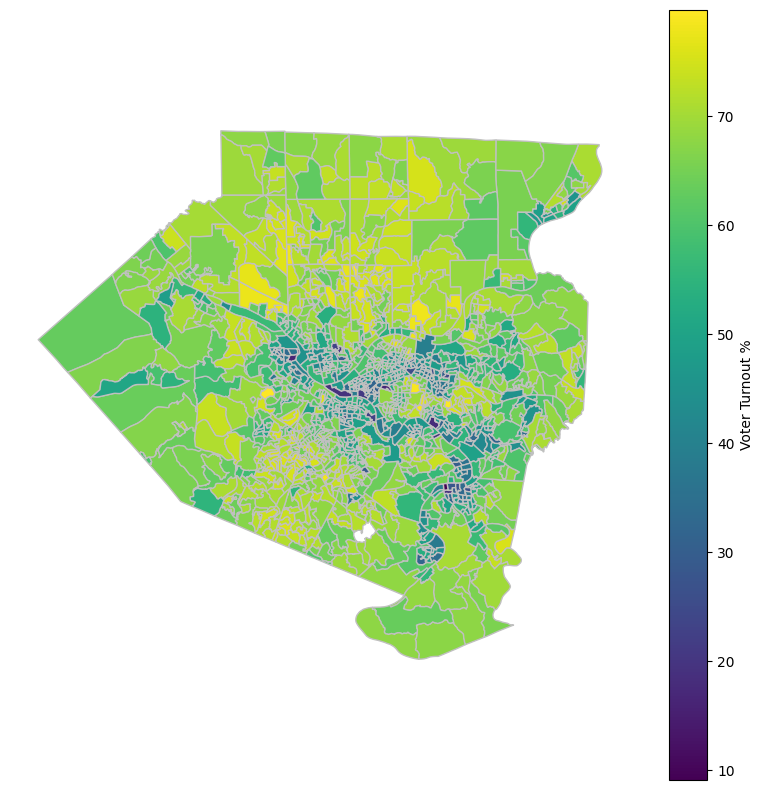

In [13]:
labeled_allegheny_general22_district_map = allegheny_general22_district_map.plot(column="Voter Turnout", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "Voter Turnout %"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                    )

# hide the x and y axis on the plot & move the legend
labeled_allegheny_general22_district_map.axis('off')

plt.show()

Note: Jefferson Hill District 9 only present after 2022

##### 15 Lowest Turnout Locations (Allegheny County)

In [14]:
# display the 15 wards/districts with the lowest turnout across Allegheny County
lowest15_allegheny_general22_turnout = allegheny_general22_turnout.sort_values('Voter Turnout', ascending=True).reset_index(drop=True)
lowest15_allegheny_general22_turnout = lowest15_allegheny_general22_turnout.head(15)
lowest15_allegheny_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,McKeesport Ward 1,11,1,0,0,1,9.09
1,Pittsburgh Ward 14 Dist 7,3604,456,116,16,588,16.32
2,McKees Rocks Ward 1 Dist 1,263,34,8,1,43,16.35
3,Rankin Ward 1,341,16,40,5,61,17.89
4,McKeesport Ward 2,215,25,15,0,40,18.60
5,West Mifflin Dist 4,444,71,12,2,85,19.14
6,Pittsburgh Ward 1 Dist 1,3281,390,228,14,632,19.26
7,Pittsburgh Ward 26 Dist 6,374,57,15,3,75,20.05
8,Pittsburgh Ward 4 Dist 1,227,31,13,3,47,20.70
9,Pittsburgh Ward 16 Dist 8,171,34,5,0,39,22.81


##### 15 Highest Turnout Locations (Allegheny County)

In [15]:
# display the 15 wards/districts with the highest turnout across Allegheny County
highest15_allegheny_general22_turnout = allegheny_general22_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
highest15_allegheny_general22_turnout = highest15_allegheny_general22_turnout.head(15)
highest15_allegheny_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Shaler Ward 6 Dist 3,553,342,95,4,441,79.75
1,Thornburg,404,257,62,3,322,79.70
2,Forest Hills Dist 1,630,332,163,4,499,79.21
3,Pittsburgh Ward 14 Dist 17,473,239,129,6,374,79.07
4,Pittsburgh Ward 14 Dist 27,538,312,107,5,424,78.81
5,Whitehall Dist 13,650,317,188,4,509,78.31
6,Pittsburgh Ward 14 Dist 19,621,338,144,4,486,78.26
7,McCandless Ward 4 Dist 3,739,409,160,8,577,78.08
8,Fox Chapel Dist 3,746,394,185,3,582,78.02
9,Pittsburgh Ward 11 Dist 10,577,274,172,3,449,77.82


##### Average Turnout

In [16]:
# get the average turnout for Allegheny County
avg_allegheny_general22_turnout = allegheny_general22_turnout['Voter Turnout'].mean()
print("Average turnout (2022 General - Allegheny): " + str(avg_allegheny_general22_turnout))

Average turnout (2022 General - Allegheny): 59.721676737160124


#### HD32

##### Turnout Map

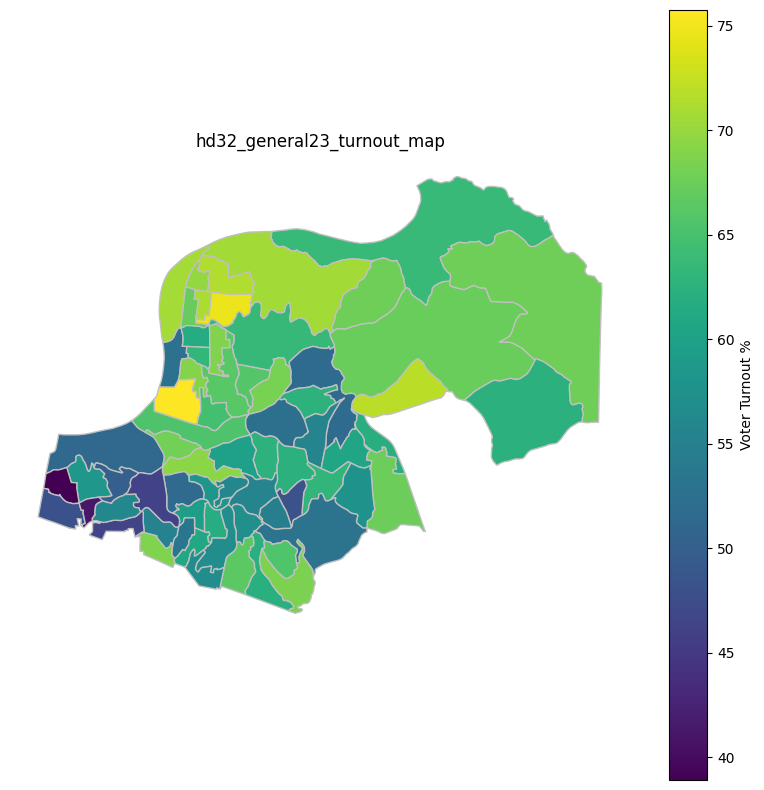

In [148]:
labeled_hd32_general22_district_map = hd32_general22_district_map.plot(column="Voter Turnout", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "Voter Turnout %"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                    )

# hide the x and y axis on the plot & move the legend
labeled_hd32_general22_district_map.set_axis_off()
labeled_hd32_general22_district_map.set_title("hd32_general23_turnout_map")

plt.show()

##### 15 Lowest Turnout Locations

In [18]:
# display the 15 wards/districts with the lowest turnout across HD32
lowest15_hd32_general22_turnout = hd32_general22_turnout.sort_values('Voter Turnout', ascending=True).reset_index(drop=True)
lowest15_hd32_general22_turnout = lowest15_hd32_general22_turnout.head(15)
lowest15_hd32_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 1 Dist 5,203,44,34,1,79,38.92
1,Penn Hills Ward 1 Dist 3,490,123,73,6,202,41.22
2,Penn Hills Ward 3 Dist 5,440,132,68,3,203,46.14
3,Penn Hills Ward 2 Dist 2,735,230,105,5,340,46.26
4,Penn Hills Ward 1 Dist 4,323,89,62,4,155,47.99
5,Penn Hills Ward 6 Dist 4,568,183,86,5,274,48.24
6,Penn Hills Ward 1 Dist 1,730,195,163,7,365,50.00
7,Penn Hills Ward 9 Dist 5,299,85,64,4,153,51.17
8,Penn Hills Ward 3 Dist 4,821,234,185,4,423,51.52
9,Penn Hills Ward 7 Dist 7,692,248,104,5,357,51.59


##### 15 Highest Turnout Locations

In [19]:
# display the 15 wards/districts with the highest turnout across HD32
highest15_hd32_general22_turnout = hd32_general22_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
highest15_hd32_general22_turnout = highest15_hd32_general22_turnout.head(15)
highest15_hd32_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 9 Dist 1,524,283,107,7,397,75.76
1,Oakmont Dist 1,869,465,181,3,649,74.68
2,Plum Dist 18,820,436,152,2,590,71.95
3,Oakmont Dist 2,1076,515,247,6,768,71.38
4,Oakmont Dist 5,679,367,110,6,483,71.13
5,Oakmont Dist 6,1306,590,317,18,925,70.83
6,Plum Dist 3,1030,454,257,16,727,70.58
7,Oakmont Dist 3,772,425,105,9,539,69.82
8,Penn Hills Ward 3 Dist 1,744,311,199,6,516,69.35
9,Penn Hills Ward 8 Dist 3,535,250,113,6,369,68.97


##### Average Turnout

In [20]:
# get the average turnout for HD32
avg_hd32_general22_turnout = hd32_general22_turnout['Voter Turnout'].mean()
print("Average turnout (2022 General - HD32): " + str(avg_hd32_general22_turnout))

Average turnout (2022 General - HD32): 60.933676470588246


##### Percentage of Countywide Turnout

In [21]:
hd32_general22_vote_count = sum(hd32_general22_turnout['Ballots Cast'])
allegheny_general22_countywide_count = allegheny_general22_turnout['Ballots Cast'][len(allegheny_general22_turnout)-1]
hd32_general22_countywide_percent = hd32_general22_vote_count / allegheny_general22_countywide_count
hd32_general22_countywide_percent * 100

5.176163775338803

#### Penn Hills

##### Turnout Map

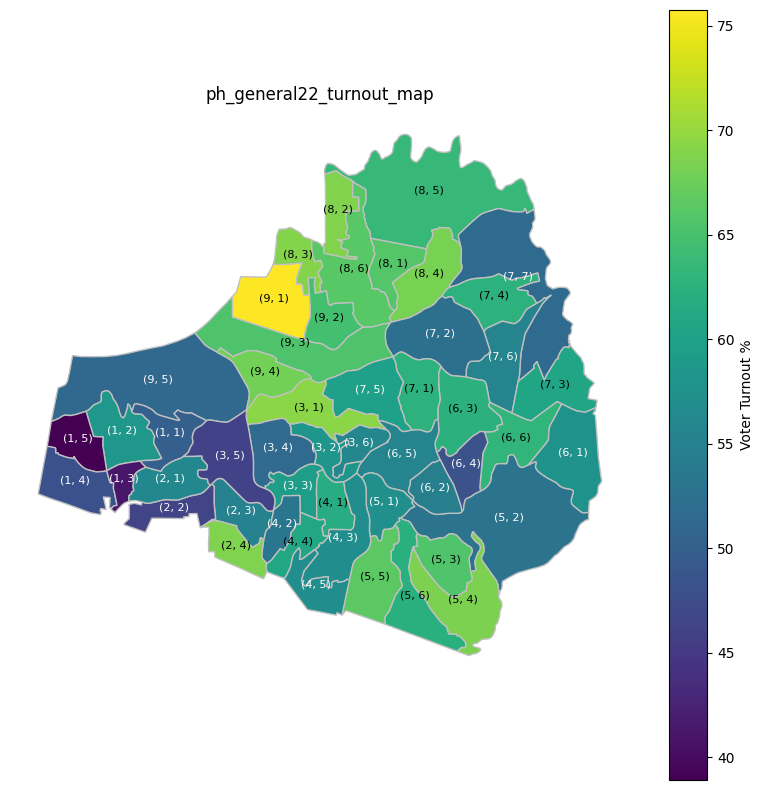

In [149]:
labeled_ph_general22_district_map = ph_general22_district_map.plot(column="Voter Turnout", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "Voter Turnout %"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                    )

# label each of the districts
for idx, row in ph_general22_district_map.iterrows():
    ward = row['WARD_1']
    district = row['DISTRICT_1']
    label = f'({ward}, {district})'
    color = 'white' if row['Voter Turnout'] < 60 else 'black'
    labeled_ph_general22_district_map.annotate(label, xy=row.geometry.centroid.coords[0], ha='center', fontsize=8, color=color)

# hide the x and y axis on the plot & move the legend
labeled_ph_general22_district_map.set_axis_off()
labeled_ph_general22_district_map.set_title("ph_general22_turnout_map")

plt.show()

##### 15 Lowest Turnout Locations (Penn Hills)

In [23]:
# get the 15 lowest turnouts from Penn Hills
lowest_ph_general22_turnout = ph_general22_turnout.sort_values('Voter Turnout', ascending=True).reset_index(drop=True)
lowest_ph_general22_turnout = lowest_ph_general22_turnout.head(15)
lowest_ph_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 1 Dist 5,203,44,34,1,79,38.92
1,Penn Hills Ward 1 Dist 3,490,123,73,6,202,41.22
2,Penn Hills Ward 3 Dist 5,440,132,68,3,203,46.14
3,Penn Hills Ward 2 Dist 2,735,230,105,5,340,46.26
4,Penn Hills Ward 1 Dist 4,323,89,62,4,155,47.99
5,Penn Hills Ward 6 Dist 4,568,183,86,5,274,48.24
6,Penn Hills Ward 1 Dist 1,730,195,163,7,365,50.00
7,Penn Hills Ward 9 Dist 5,299,85,64,4,153,51.17
8,Penn Hills Ward 3 Dist 4,821,234,185,4,423,51.52
9,Penn Hills Ward 7 Dist 7,692,248,104,5,357,51.59


##### 15 Highest Turnout Locations (Penn Hills)

In [24]:
# get the 15 highest turnouts from Penn Hills
highest_ph_general22_turnout = ph_general22_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
highest_ph_general22_turnout = highest_ph_general22_turnout.head(15)
highest_ph_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 9 Dist 1,524,283,107,7,397,75.76
1,Penn Hills Ward 3 Dist 1,744,311,199,6,516,69.35
2,Penn Hills Ward 8 Dist 3,535,250,113,6,369,68.97
3,Penn Hills Ward 8 Dist 2,566,297,87,5,389,68.73
4,Penn Hills Ward 2 Dist 4,583,237,158,5,400,68.61
5,Penn Hills Ward 5 Dist 4,602,273,133,6,412,68.44
6,Penn Hills Ward 8 Dist 4,630,283,141,6,430,68.25
7,Penn Hills Ward 9 Dist 4,596,292,109,4,405,67.95
8,Penn Hills Ward 5 Dist 5,532,252,88,14,354,66.54
9,Penn Hills Ward 8 Dist 6,474,214,97,3,314,66.24


##### Average Turnout (Penn Hills)

In [25]:
# get the average turnout for all of Penn Hills
avg_ph_general22_turnout = ph_general22_turnout['Voter Turnout'].mean()
print("Average turnout (2022 General - Penn Hills): " + str(avg_ph_general22_turnout))

Average turnout (2022 General - Penn Hills): 58.8


##### Percentage of Countywide Turnout

In [26]:
ph_general22_vote_count = sum(ph_general22_turnout['Ballots Cast'])
ph_general22_countywide_percent = ph_general22_vote_count / allegheny_general22_countywide_count
ph_general22_countywide_percent * 100

3.1864638061627018

##### Percentage of Districtwide (PA House) Turnout

In [27]:
ph_general22_districtwide_percent = ph_general22_vote_count / hd32_general22_vote_count
ph_general22_districtwide_percent * 100

61.560335887056304

#### Oakmont

##### Turnout Map

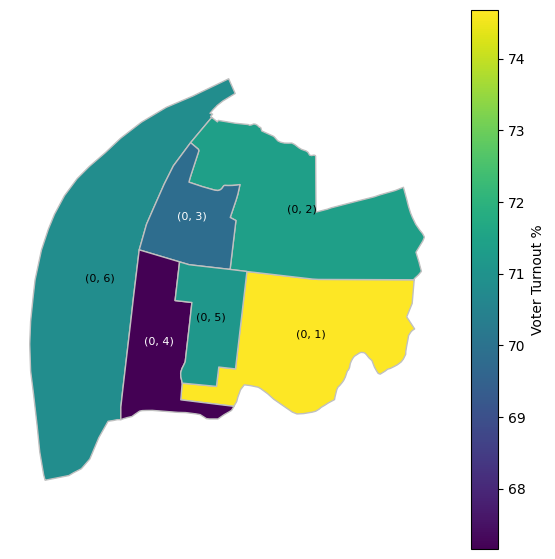

In [28]:
labeled_oakmont_general22_district_map = oakmont_general22_district_map.plot(column="Voter Turnout", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "Voter Turnout %"}, #Label the legend
                       figsize=(7,7), #Set the size of the graph
                    )

# label each of the districts
for idx, row in oakmont_general22_district_map.iterrows():
    ward = row['WARD_1']
    district = row['DISTRICT_1']
    label = f'({ward}, {district})'
    color = 'white' if row['Voter Turnout'] < 70 else 'black'
    labeled_oakmont_general22_district_map.annotate(label, xy=row.geometry.centroid.coords[0], ha='center', fontsize=8, color=color)

# hide the x and y axis on the plot & move the legend
labeled_oakmont_general22_district_map.axis('off')

plt.show()

##### Turnout Locations (Highest to Lowest)

In [29]:
lowest_oakmont_general22_turnout = oakmont_general22_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
lowest_oakmont_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Oakmont Dist 1,869,465,181,3,649,74.68
1,Oakmont Dist 2,1076,515,247,6,768,71.38
2,Oakmont Dist 5,679,367,110,6,483,71.13
3,Oakmont Dist 6,1306,590,317,18,925,70.83
4,Oakmont Dist 3,772,425,105,9,539,69.82
5,Oakmont Dist 4,883,441,142,10,593,67.16


##### Average Turnout Percentage

In [30]:
avg_oakmont_general22_turnout = oakmont_general22_turnout['Voter Turnout'].mean()
print("Average turnout (2022 General - Oakmont): " + str(avg_oakmont_general22_turnout))

Average turnout (2022 General - Oakmont): 70.83333333333333


##### Percentage of Countywide Turnout

In [31]:
oakmont_general22_vote_count = sum(oakmont_general22_turnout['Ballots Cast'])
oakmont_general22_countywide_percent = oakmont_general22_vote_count / allegheny_general22_countywide_count
oakmont_general22_countywide_percent * 100

0.6852256551810124

##### Percentage of Districtwide (PA House) Turnout

In [32]:
oakmont_general22_districtwide_percent = oakmont_general22_vote_count / hd32_general22_vote_count
oakmont_general22_districtwide_percent * 100

13.238098424274867

#### Verona

##### Turnout Map

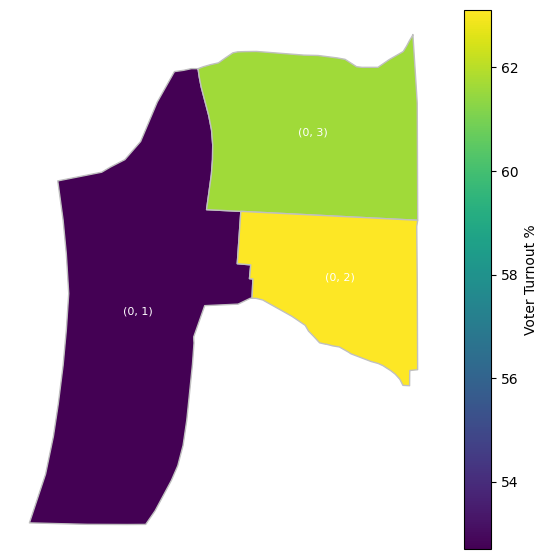

In [33]:
labeled_verona_general22_district_map = verona_general22_district_map.plot(column="Voter Turnout", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "Voter Turnout %"}, #Label the legend
                       figsize=(7,7), #Set the size of the graph
                    )

# label each of the districts
for idx, row in verona_general22_district_map.iterrows():
    ward = row['WARD_1']
    district = row['DISTRICT_1']
    label = f'({ward}, {district})'
    color = 'white' if row['Voter Turnout'] < 70 else 'black'
    labeled_verona_general22_district_map.annotate(label, xy=row.geometry.centroid.coords[0], ha='center', fontsize=8, color=color)

# hide the x and y axis on the plot & move the legend
labeled_verona_general22_district_map.axis('off')

plt.show()

##### Turnout Locations (Highest to Lowest)

In [34]:
highest_verona_general22_turnout = verona_general22_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
highest_verona_general22_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Verona Dist 2,591,302,66,5,373,63.11
1,Verona Dist 3,594,288,75,3,366,61.62
2,Verona Dist 1,518,223,49,1,273,52.70


##### Average Turnout Percentage

In [35]:
avg_verona_general22_turnout = verona_general22_turnout['Voter Turnout'].mean()
print("Average turnout (2022 General - Verona): " + str(avg_verona_general22_turnout))

Average turnout (2022 General - Verona): 59.14333333333334


##### Percentage of Countywide Turnout

In [36]:
verona_general22_vote_count = sum(verona_general22_turnout['Ballots Cast'])
verona_general22_countywide_percent = verona_general22_vote_count / allegheny_general22_countywide_count
verona_general22_countywide_percent * 100

0.17524598510062792

##### Percentage of Districtwide (PA House) Turnout

In [37]:
verona_general22_districtwide_percent = verona_general22_vote_count / hd32_general22_vote_count
verona_general22_districtwide_percent * 100

3.3856344719146234

#### Plum

##### Turnout Map

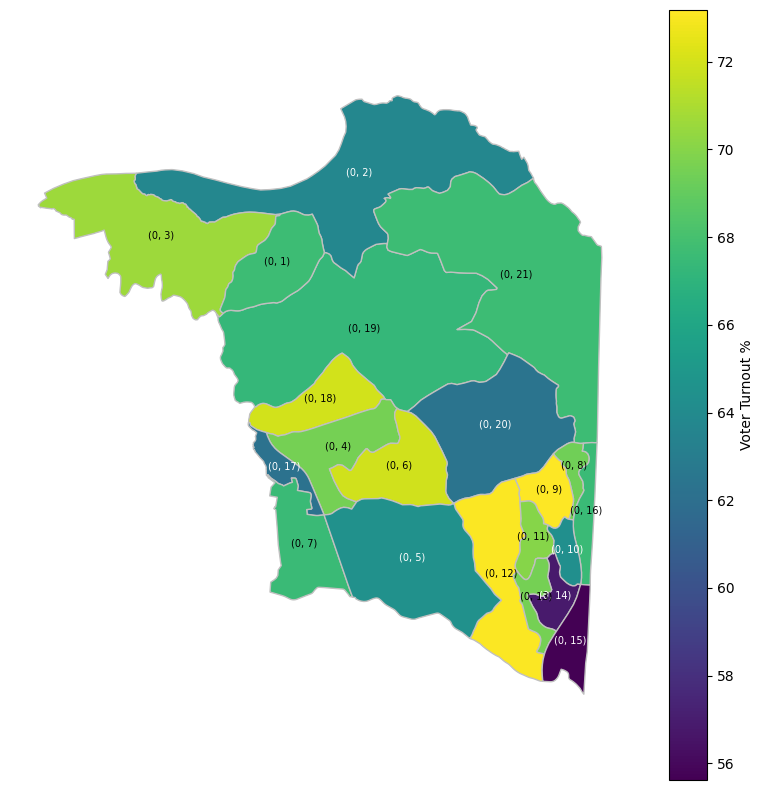

In [38]:
labeled_plum_general22_district_map = plum_general22_district_map.plot(column="Voter Turnout", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "Voter Turnout %"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                    )

# label each of the districts
for idx, row in plum_general22_district_map.iterrows():
    ward = row['WARD_1']
    district = row['DISTRICT_1']
    label = f'({ward}, {district})'
    color = 'white' if row['Voter Turnout'] < 65 else 'black'
    labeled_plum_general22_district_map.annotate(label, xy=row.geometry.centroid.coords[0], ha='center', fontsize=7, color=color)

# hide the x and y axis on the plot & move the legend
labeled_plum_general22_district_map.axis('off')

plt.show()

##### 10 Highest Turnout Locations

In [39]:
highest_plum_general22_turnout = plum_general22_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
highest_plum_general22_turnout.head(10)

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Plum Dist 9,1137,546,278,8,832,73.18
1,Plum Dist 12,1139,613,208,11,832,73.05
2,Plum Dist 18,820,436,152,2,590,71.95
3,Plum Dist 6,1285,732,181,11,924,71.91
4,Plum Dist 3,1030,454,257,16,727,70.58
5,Plum Dist 11,813,431,136,2,569,69.99
6,Plum Dist 13,567,299,94,1,394,69.49
7,Plum Dist 4,842,446,136,3,585,69.48
8,Plum Dist 8,594,302,106,4,412,69.36
9,Plum Dist 21,430,241,49,1,291,67.67


##### 10 Lowest Turnout Locations

In [40]:
lowest_plum_general22_turnout = plum_general22_turnout.sort_values('Voter Turnout', ascending=True).reset_index(drop=True)
lowest_plum_general22_turnout.head(10)

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Plum Dist 15,890,365,123,7,495,55.62
1,Plum Dist 14,746,306,114,4,424,56.84
2,Plum Dist 17,688,323,97,8,428,62.21
3,Plum Dist 20,989,467,144,6,617,62.39
4,Plum Dist 2,632,312,87,4,403,63.77
5,Plum Dist 10,608,298,93,0,391,64.31
6,Plum Dist 5,878,433,130,3,566,64.46
7,Plum Dist 19,2085,1034,355,14,1403,67.29
8,Plum Dist 16,610,307,105,0,412,67.54
9,Plum Dist 7,1245,606,232,3,841,67.55


##### Average Turnout Percentage

In [41]:
avg_plum_general22_turnout = plum_general22_turnout['Voter Turnout'].mean()
print("Average turnout (2022 General - Plum): " + str(avg_plum_general22_turnout))

Average turnout (2022 General - Plum): 66.96619047619049


##### Percentage of Countywide Turnout

In [42]:
plum_general22_vote_count = sum(plum_general22_turnout['Ballots Cast'])
plum_general22_countywide_percent = plum_general22_vote_count / allegheny_general22_countywide_count
plum_general22_countywide_percent * 100

2.3130045681710345

##### Percentage of Districtwide (PA House) Turnout

In [43]:
plum_general22_districtwide_percent = plum_general22_vote_count / hd32_general22_vote_count
plum_general22_districtwide_percent * 100

44.68569134522097

### HD32 2023 Special Election **(McAndrew v. Walker)**

In [44]:
# get only the rows that have 'hd32_special23_detail.xls' as the Filename
hd32_special_turnout = turnouts[turnouts['Filename'] == 'hd32_special23_detail.xls']
hd32_special_turnout = hd32_special_turnout.drop('Filename', axis=1)
hd32_special_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Oakmont Dist 1,843,210,115,3,328,38.91
1,Oakmont Dist 2,1038,187,160,2,349,33.62
2,Oakmont Dist 3,750,161,79,3,243,32.40
3,Oakmont Dist 4,849,156,96,1,253,29.80
4,Oakmont Dist 5,645,128,65,2,195,30.23
...,...,...,...,...,...,...,...
64,Plum Dist 21,423,72,37,0,109,25.77
65,Verona Dist 1,494,69,41,1,111,22.47
66,Verona Dist 2,561,102,50,0,152,27.09
67,Verona Dist 3,571,104,53,2,159,27.85


In [45]:
# get Penn Hills wards/districts
ph_hd32_special_turnout = hd32_special_turnout[hd32_special_turnout['County'].str.contains("Penn Hills")]
ph_hd32_special_turnout.reset_index(drop=True)

# get Oakmont wards/districts
oakmont_hd32_special_turnout = hd32_special_turnout[hd32_special_turnout['County'].str.contains("Oakmont")]
oakmont_hd32_special_turnout.reset_index(drop=True)

# get Verona wards/districts
verona_hd32_special_turnout = hd32_special_turnout[hd32_special_turnout['County'].str.contains("Verona")]
verona_hd32_special_turnout.reset_index(drop=True)

# get Plum wards/districts
plum_hd32_special_turnout = hd32_special_turnout[hd32_special_turnout['County'].str.contains("Plum")]
plum_hd32_special_turnout.reset_index(drop=True)

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Plum Dist 1,1744,184,225,0,409,23.45
1,Plum Dist 2,622,87,57,1,145,23.31
2,Plum Dist 3,1008,177,168,8,353,35.02
3,Plum Dist 7,1200,158,140,3,301,25.08
4,Plum Dist 17,646,102,70,1,173,26.78
5,Plum Dist 18,806,137,107,1,245,30.40
6,Plum Dist 19,2062,253,224,0,477,23.13
7,Plum Dist 20,965,147,99,1,247,25.60
8,Plum Dist 21,423,72,37,0,109,25.77


In [46]:
# get the HD32 map
hd32_district_map = allegheny_district_map.copy(deep=True)
hd32_district_map = hd32_district_map[hd32_district_map['Muni_War_1'].isin(hd32_special_turnout['County'])]

# link the election results to the map
hd32_special_district_map = hd32_district_map.merge(hd32_special_turnout, how='left', left_on='Muni_War_1', right_on='County')
ph_special23_district_map = ph_district_map.merge(ph_hd32_special_turnout, how="left", left_on="Muni_War_1", right_on="County")
verona_special23_district_map = verona_district_map.merge(verona_hd32_special_turnout, how="left", left_on="Muni_War_1", right_on="County")
oakmont_special23_district_map = oakmont_district_map.merge(oakmont_hd32_special_turnout, how="left", left_on="Muni_War_1", right_on="County")
plum_special23_district_map = plum_district_map.merge(plum_hd32_special_turnout, how="left", left_on="Muni_War_1", right_on="County")

#### HD32

##### Turnout Map

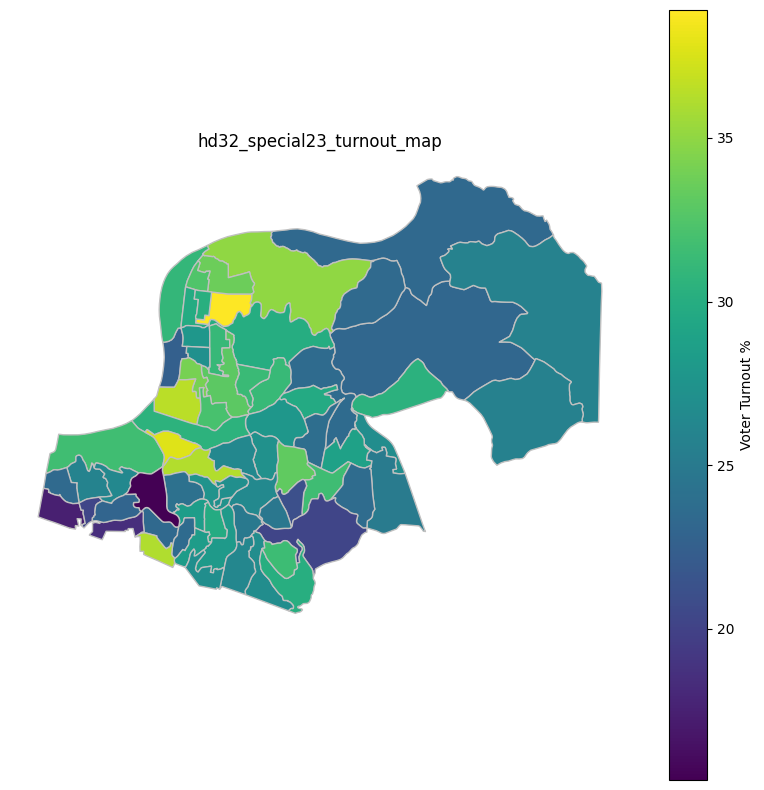

In [150]:
labeled_hd32_special_district_map = hd32_special_district_map.plot(column="Voter Turnout", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "Voter Turnout %"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                    )

# hide the x and y axis on the plot & move the legend
labeled_hd32_special_district_map.set_axis_off()
labeled_hd32_special_district_map.set_title("hd32_special23_turnout_map")

plt.show()

##### 15 Lowest Turnout Locations (HD32)

In [48]:
# display the 15 wards/districts with the lowest turnout across all HD32
lowest10_hd32_special_turnout = hd32_special_turnout.sort_values('Voter Turnout', ascending=True).reset_index(drop=True)
lowest10_hd32_special_turnout = lowest10_hd32_special_turnout.head(15)
lowest10_hd32_special_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 3 Dist 5,416,27,37,0,64,15.38
1,Penn Hills Ward 1 Dist 4,304,16,37,0,53,17.43
2,Penn Hills Ward 2 Dist 2,692,57,71,0,128,18.50
3,Penn Hills Ward 5 Dist 2,584,60,58,0,118,20.21
4,Penn Hills Ward 1 Dist 3,449,32,55,4,91,20.27
5,Penn Hills Ward 6 Dist 4,536,48,63,2,113,21.08
6,Verona Dist 1,494,69,41,1,111,22.47
7,Penn Hills Ward 2 Dist 1,675,55,95,5,155,22.96
8,Plum Dist 19,2062,253,224,0,477,23.13
9,Plum Dist 2,622,87,57,1,145,23.31


##### 15 Highest Turnout Locations (HD32)

In [49]:
# display the top 15 wards/districts with the highest turnout across all HD32
top10_hd32_special_turnout = hd32_special_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
top10_hd32_special_turnout = top10_hd32_special_turnout.head(15)
top10_hd32_special_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Oakmont Dist 1,843,210,115,3,328,38.91
1,Penn Hills Ward 9 Dist 4,583,133,86,1,220,37.74
2,Penn Hills Ward 9 Dist 1,513,100,86,1,187,36.45
3,Penn Hills Ward 3 Dist 1,726,138,124,1,263,36.23
4,Penn Hills Ward 2 Dist 4,560,78,123,1,202,36.07
5,Plum Dist 3,1008,177,168,8,353,35.02
6,Penn Hills Ward 8 Dist 3,514,87,87,1,175,34.05
7,Oakmont Dist 2,1038,187,160,2,349,33.62
8,Penn Hills Ward 6 Dist 3,497,80,84,1,165,33.20
9,Penn Hills Ward 8 Dist 6,464,84,69,0,153,32.97


#### Penn Hills

##### Turnout Map

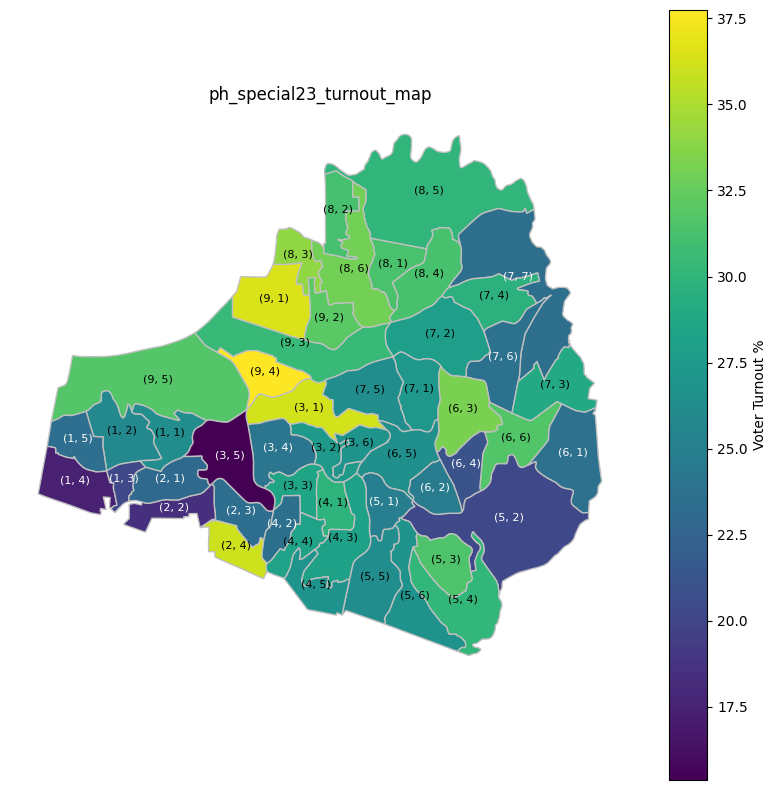

In [151]:
labeled_ph_special23_district_map = ph_special23_district_map.plot(column="Voter Turnout", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "Voter Turnout %"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                    )

# label each of the districts
for idx, row in ph_special23_district_map.iterrows():
    ward = row['WARD_1']
    district = row['DISTRICT_1']
    label = f'({ward}, {district})'
    color = 'white' if row['Voter Turnout'] < 25 else 'black'
    labeled_ph_special23_district_map.annotate(label, xy=row.geometry.centroid.coords[0], ha='center', fontsize=8, color=color)

# hide the x and y axis on the plot & move the legend
labeled_ph_special23_district_map.set_axis_off()
labeled_ph_special23_district_map.set_title("ph_special23_turnout_map")

plt.show()

##### 15 Lowest Turnout Locations (Penn Hills)

In [51]:
# get the 15 lowest turnouts from Penn Hills
lowest_ph_hd32_special_turnout = ph_hd32_special_turnout.sort_values('Voter Turnout', ascending=True).reset_index(drop=True)
lowest_ph_hd32_special_turnout = lowest_ph_hd32_special_turnout.head(15)
lowest_ph_hd32_special_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 3 Dist 5,416,27,37,0,64,15.38
1,Penn Hills Ward 1 Dist 4,304,16,37,0,53,17.43
2,Penn Hills Ward 2 Dist 2,692,57,71,0,128,18.50
3,Penn Hills Ward 5 Dist 2,584,60,58,0,118,20.21
4,Penn Hills Ward 1 Dist 3,449,32,55,4,91,20.27
5,Penn Hills Ward 6 Dist 4,536,48,63,2,113,21.08
6,Penn Hills Ward 2 Dist 1,675,55,95,5,155,22.96
7,Penn Hills Ward 2 Dist 3,793,93,90,2,185,23.33
8,Penn Hills Ward 1 Dist 5,188,17,27,0,44,23.40
9,Penn Hills Ward 7 Dist 7,664,73,83,0,156,23.49


##### 15 Highest Turnout Locations (Penn Hills)

In [52]:
# get the top 15 from Penn Hills
top15_ph_hd32_special_turnout = ph_hd32_special_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
top15_ph_hd32_special_turnout = top15_ph_hd32_special_turnout.head(15)
top15_ph_hd32_special_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 9 Dist 4,583,133,86,1,220,37.74
1,Penn Hills Ward 9 Dist 1,513,100,86,1,187,36.45
2,Penn Hills Ward 3 Dist 1,726,138,124,1,263,36.23
3,Penn Hills Ward 2 Dist 4,560,78,123,1,202,36.07
4,Penn Hills Ward 8 Dist 3,514,87,87,1,175,34.05
5,Penn Hills Ward 6 Dist 3,497,80,84,1,165,33.20
6,Penn Hills Ward 8 Dist 6,464,84,69,0,153,32.97
7,Penn Hills Ward 9 Dist 2,546,87,87,1,175,32.05
8,Penn Hills Ward 9 Dist 5,290,42,48,2,92,31.72
9,Penn Hills Ward 6 Dist 6,547,86,85,2,173,31.63


##### Average Turnout (Penn Hills)

In [53]:
# get the average turnout for all of Penn Hills
avg_ph_special_turnout = ph_hd32_special_turnout['Voter Turnout'].mean()
print("Average turnout (HD32 Special - Penn Hills): " + str(avg_ph_special_turnout))

Average turnout (HD32 Special - Penn Hills): 27.5216


### 2023 General Election

In [54]:
# get only the rows that have 'hd32_special23_detail.xls' as the Filename
allegheny_general23_turnout = turnouts[turnouts['Filename'] == 'allegheny_general23_detail.xls']
allegheny_general23_turnout = allegheny_general23_turnout.drop('Filename', axis=1).reset_index(drop=True)
allegheny_general23_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Aleppo,1335,481,274,1,756,56.63
1,Aspinwall Dist 1,833,419,76,3,498,59.78
2,Aspinwall Dist 2,567,235,64,2,301,53.09
3,Aspinwall Dist 3,813,388,94,2,484,59.53
4,Avalon Ward 1,1030,267,89,4,360,34.95
...,...,...,...,...,...,...,...
1320,Wilkinsburg Ward 3 Dist 5,958,177,80,6,263,27.45
1321,Wilkinsburg Ward 3 Dist 6,476,81,27,3,111,23.32
1322,Wilmerding Dist 1,463,47,33,2,82,17.71
1323,Wilmerding Dist 2,655,111,60,3,174,26.56


In [55]:
# get only the HD32 wards/precincts
hd32_general23_turnout = allegheny_general23_turnout[allegheny_general23_turnout['County'].isin(hd32_districts[0])]
hd32_general23_turnout = hd32_general23_turnout.reset_index(drop=True)
hd32_general23_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Oakmont Dist 1,843,357,118,2,477,56.58
1,Oakmont Dist 2,1033,406,172,7,585,56.63
2,Oakmont Dist 3,742,285,80,0,365,49.19
3,Oakmont Dist 4,854,310,110,1,421,49.30
4,Oakmont Dist 5,641,272,68,1,341,53.20
...,...,...,...,...,...,...,...
63,Plum Dist 20,963,267,106,1,374,38.84
64,Plum Dist 21,419,138,40,0,178,42.48
65,Verona Dist 1,496,129,37,5,171,34.48
66,Verona Dist 2,552,169,42,1,212,38.41


In [56]:
# get only Penn Hills wards/districts
ph_general23_turnout = allegheny_general23_turnout[allegheny_general23_turnout['County'].str.contains("Penn Hills")]
ph_general23_turnout = ph_general23_turnout.reset_index(drop=True)
if not os.path.exists("ph_general23_turnout.xlsx"):
    ph_general23_turnout.to_excel('ph_general23_turnout.xlsx', sheet_name='data', index=False, columns=['County', 'Registered Voters', 'Election Day', 'Absentee', 'Provisional', 'Ballots Cast', 'Voter Turnout'])
ph_general23_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 1 Dist 1,685,120,116,3,239,34.89
1,Penn Hills Ward 1 Dist 2,704,157,111,2,270,38.35
2,Penn Hills Ward 1 Dist 3,451,57,53,1,111,24.61
3,Penn Hills Ward 1 Dist 4,298,49,33,2,84,28.19
4,Penn Hills Ward 1 Dist 5,197,31,30,0,61,30.96
5,Penn Hills Ward 2 Dist 1,680,133,96,2,231,33.97
6,Penn Hills Ward 2 Dist 2,693,135,68,4,207,29.87
7,Penn Hills Ward 2 Dist 3,815,167,103,2,272,33.37
8,Penn Hills Ward 2 Dist 4,563,152,112,7,271,48.13
9,Penn Hills Ward 3 Dist 1,732,202,128,1,331,45.22


In [57]:
# remove apostrophes from the 'Muni_War_1' column
allegheny_district_map['Muni_War_1'] = allegheny_district_map['Muni_War_1'].apply(lambda x: re.sub(r"'", '', x))
allegheny_general23_turnout['County'] = allegheny_general23_turnout['County'].apply(lambda x: re.sub(r"'", '', x))

# fix the district names for Springdale
allegheny_district_map['Muni_War_1'] = allegheny_district_map['Muni_War_1'].apply(lambda x: re.sub(r"Springdal ", 'Springdale ', x))

# link the election results to the map
allegheny_general23_district_map = allegheny_district_map.merge(allegheny_general23_turnout, how='left', left_on=allegheny_district_map['Muni_War_1'].str.lower(), right_on=allegheny_general23_turnout['County'].str.lower())
hd32_general23_district_map = hd32_district_map.merge(hd32_general23_turnout, how="left", left_on="Muni_War_1", right_on="County")
ph_general23_district_map = ph_district_map.merge(ph_general23_turnout, how="left", left_on="Muni_War_1", right_on="County")

#### Allegheny County

##### Turnout Map

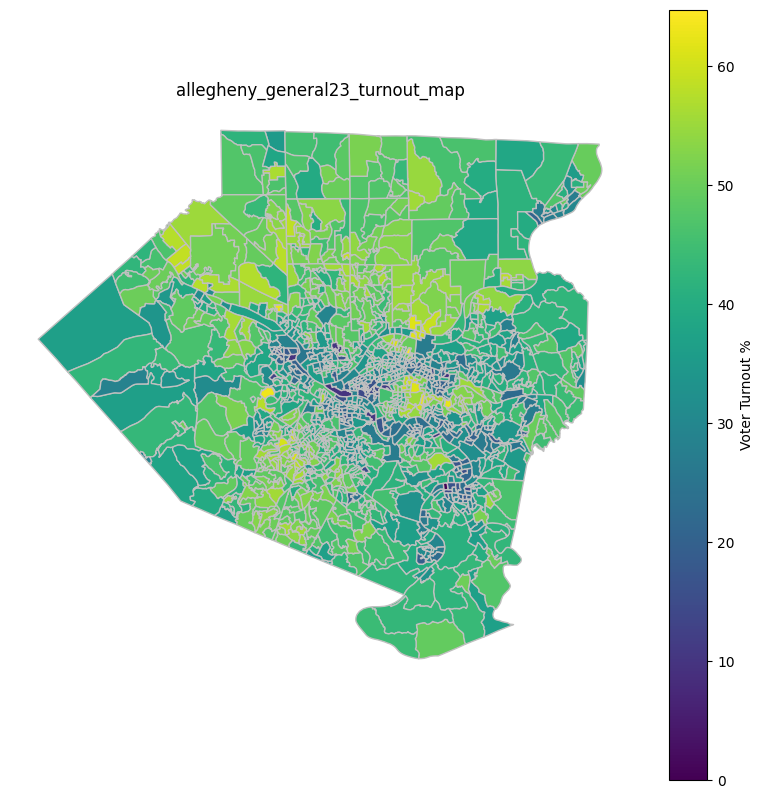

In [152]:
labeled_allegheny_general23_district_map = allegheny_general23_district_map.plot(column="Voter Turnout", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "Voter Turnout %"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                    )

# hide the x and y axis on the plot & move the legend
labeled_allegheny_general23_district_map.set_axis_off()
labeled_allegheny_general23_district_map.set_title("allegheny_general23_turnout_map")

plt.show()

##### 15 Lowest Turnouts (Allegheny County)

In [59]:
# display the 15 wards/districts with the lowest turnout across Allegheny County
lowest15_allegheny_general23_turnout = allegheny_general23_turnout.sort_values('Voter Turnout', ascending=True).reset_index(drop=True)
lowest15_allegheny_general23_turnout = lowest15_allegheny_general23_turnout.head(15)
lowest15_allegheny_general23_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,McKeesport Ward 1,10,0,0,0,0,0.00
1,Pittsburgh Ward 13 Dist 18,232,21,0,0,21,9.05
2,McKees Rocks Ward 1 Dist 1,245,18,5,0,23,9.39
3,West Mifflin Dist 4,393,30,8,0,38,9.67
4,Pittsburgh Ward 1 Dist 1,3015,177,112,4,293,9.72
5,Pittsburgh Ward 26 Dist 5,447,33,11,0,44,9.84
6,Pittsburgh Ward 16 Dist 8,175,14,3,1,18,10.29
7,Pittsburgh Ward 4 Dist 8,2351,231,6,18,255,10.85
8,Pittsburgh Ward 14 Dist 7,2742,232,63,7,302,11.01
9,Pittsburgh Ward 26 Dist 6,357,28,10,3,41,11.48


##### 15 Highest Turnouts (Allegheny County)

In [60]:
# display the top 15 wards/districts with the highest turnout across Allegheny County
top15_allegheny_general23_turnout = allegheny_general23_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
top15_allegheny_general23_turnout = top15_allegheny_general23_turnout.head(15)
top15_allegheny_general23_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Pittsburgh Ward 11 Dist 10,573,249,119,3,371,64.75
1,Thornburg,394,217,32,0,249,63.20
2,Pittsburgh Ward 14 Dist 19,600,276,96,6,378,63.00
3,Forest Hills Dist 1,604,260,116,1,377,62.42
4,Ben Avon Ht,337,171,39,0,210,62.31
5,OHara Ward 4 Dist 2,603,229,138,4,371,61.53
6,Pittsburgh Ward 14 Dist 16,468,190,94,3,287,61.32
7,Pittsburgh Ward 14 Dist 17,464,195,85,4,284,61.21
8,Mt Lebanon Ward 5 Dist 5,640,258,131,1,390,60.94
9,Pittsburgh Ward 10 Dist 10,581,256,97,1,354,60.93


##### Average Turnout

In [61]:
# get the average turnout for Allegheny County
avg_allegheny_general23_turnout = allegheny_general23_turnout['Voter Turnout'].mean()
print("Average turnout (2023 General - Allegheny): " + str(avg_allegheny_general23_turnout))

Average turnout (2023 General - Allegheny): 39.87390943396226


#### HD32

##### Turnout Map

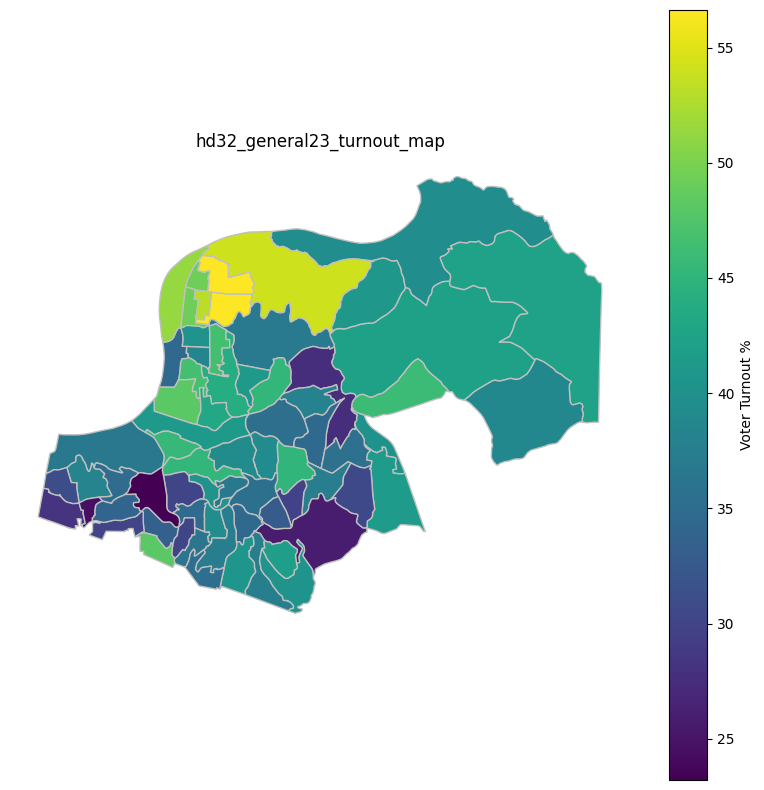

In [154]:
labeled_hd32_general23_district_map = hd32_general23_district_map.plot(column="Voter Turnout", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "Voter Turnout %"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                    )

# hide the x and y axis on the plot & move the legend
labeled_hd32_general23_district_map.set_axis_off()
labeled_hd32_general23_district_map.set_title("hd32_general23_turnout_map")

plt.show()

##### 15 Lowest Turnout Locations

In [63]:
# display the 15 wards/districts with the lowest turnout across all HD32
lowest15_hd32_general23_turnout = hd32_general23_turnout.sort_values('Voter Turnout', ascending=True).reset_index(drop=True)
lowest15_hd32_general23_turnout = lowest15_hd32_general23_turnout.head(15)
lowest15_hd32_general23_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 3 Dist 5,405,60,34,0,94,23.21
1,Penn Hills Ward 1 Dist 3,451,57,53,1,111,24.61
2,Penn Hills Ward 5 Dist 2,579,90,56,4,150,25.91
3,Penn Hills Ward 7 Dist 7,656,101,80,0,181,27.59
4,Penn Hills Ward 1 Dist 4,298,49,33,2,84,28.19
5,Penn Hills Ward 6 Dist 4,530,105,51,2,158,29.81
6,Penn Hills Ward 2 Dist 2,693,135,68,4,207,29.87
7,Penn Hills Ward 4 Dist 2,701,129,82,0,211,30.10
8,Penn Hills Ward 3 Dist 4,757,106,122,0,228,30.12
9,Penn Hills Ward 6 Dist 1,545,109,58,0,167,30.64


##### 15 Highest Turnout Locations

In [64]:
# display the 15 wards/districts with the highest turnout across all HD32
highest15_hd32_general23_turnout = hd32_general23_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
highest15_hd32_general23_turnout = highest15_hd32_general23_turnout.head(15)
highest15_hd32_general23_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Oakmont Dist 2,1033,406,172,7,585,56.63
1,Oakmont Dist 1,843,357,118,2,477,56.58
2,Plum Dist 3,1023,342,206,5,553,54.06
3,Oakmont Dist 5,641,272,68,1,341,53.20
4,Oakmont Dist 6,1287,414,241,5,660,51.28
5,Oakmont Dist 4,854,310,110,1,421,49.30
6,Oakmont Dist 3,742,285,80,0,365,49.19
7,Penn Hills Ward 2 Dist 4,563,152,112,7,271,48.13
8,Penn Hills Ward 9 Dist 1,503,163,79,0,242,48.11
9,Penn Hills Ward 8 Dist 2,531,186,61,1,248,46.70


##### Average Turnout

In [65]:
# get the average turnout for HD32
avg_hd32_general23_turnout = hd32_general23_turnout['Voter Turnout'].mean()
print("Average turnout (2023 General - HD32): " + str(avg_hd32_general23_turnout))

Average turnout (2023 General - HD32): 39.16029411764706


#### Penn Hills

##### Turnout Map

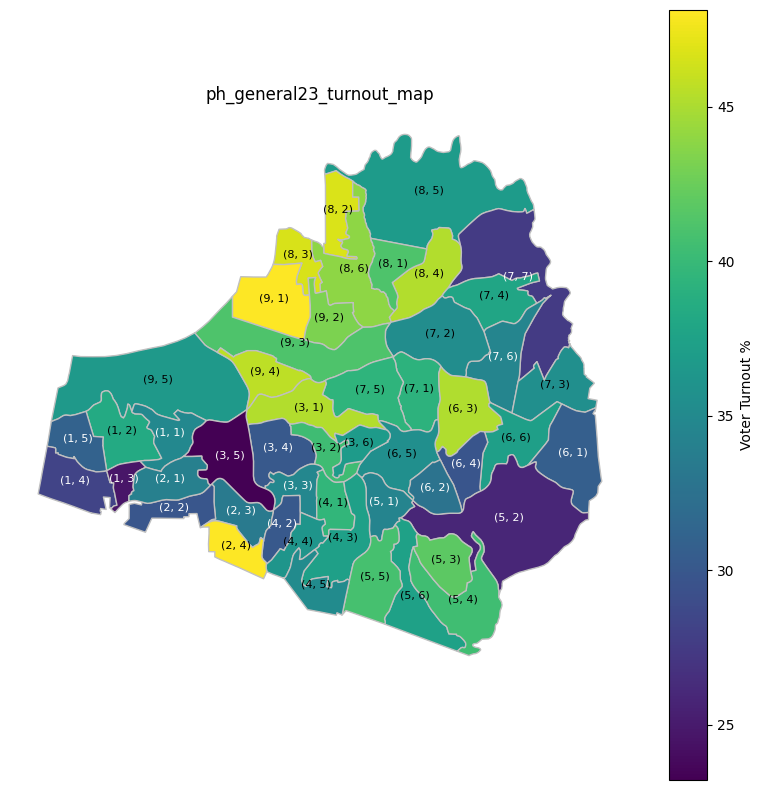

In [155]:
labeled_ph_general23_district_map = ph_general23_district_map.plot(column="Voter Turnout", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "Voter Turnout %"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                    )

# label each of the districts
for idx, row in ph_general23_district_map.iterrows():
    ward = row['WARD_1']
    district = row['DISTRICT_1']
    label = f'({ward}, {district})'
    color = 'white' if row['Voter Turnout'] < 35 else 'black'
    labeled_ph_general23_district_map.annotate(label, xy=row.geometry.centroid.coords[0], ha='center', fontsize=8, color=color)

# hide the x and y axis on the plot & move the legend
labeled_ph_general23_district_map.set_axis_off()
labeled_ph_general23_district_map.set_title("ph_general23_turnout_map")

plt.show()

##### 15 Lowest Turnout Locations (Penn Hills)

In [67]:
# get the 15 lowest turnouts from Penn Hills
lowest_ph_general23_turnout = ph_general23_turnout.sort_values('Voter Turnout', ascending=True).reset_index(drop=True)
lowest_ph_general23_turnout = lowest_ph_general23_turnout.head(15)
lowest_ph_general23_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 3 Dist 5,405,60,34,0,94,23.21
1,Penn Hills Ward 1 Dist 3,451,57,53,1,111,24.61
2,Penn Hills Ward 5 Dist 2,579,90,56,4,150,25.91
3,Penn Hills Ward 7 Dist 7,656,101,80,0,181,27.59
4,Penn Hills Ward 1 Dist 4,298,49,33,2,84,28.19
5,Penn Hills Ward 6 Dist 4,530,105,51,2,158,29.81
6,Penn Hills Ward 2 Dist 2,693,135,68,4,207,29.87
7,Penn Hills Ward 4 Dist 2,701,129,82,0,211,30.10
8,Penn Hills Ward 3 Dist 4,757,106,122,0,228,30.12
9,Penn Hills Ward 6 Dist 1,545,109,58,0,167,30.64


##### 15 Highest Turnout Locations (Penn Hills)

In [68]:
# get the 15 highest turnouts from Penn Hills
highest_ph_general23_turnout = ph_general23_turnout.sort_values('Voter Turnout', ascending=False).reset_index(drop=True)
highest_ph_general23_turnout = highest_ph_general23_turnout.head(15)
highest_ph_general23_turnout

,County,Registered Voters,Election Day,Absentee,Provisional,Ballots Cast,Voter Turnout
0,Penn Hills Ward 2 Dist 4,563,152,112,7,271,48.13
1,Penn Hills Ward 9 Dist 1,503,163,79,0,242,48.11
2,Penn Hills Ward 8 Dist 2,531,186,61,1,248,46.70
3,Penn Hills Ward 8 Dist 3,513,159,80,0,239,46.59
4,Penn Hills Ward 9 Dist 4,587,190,78,0,268,45.66
5,Penn Hills Ward 8 Dist 4,603,163,109,1,273,45.27
6,Penn Hills Ward 3 Dist 1,732,202,128,1,331,45.22
7,Penn Hills Ward 6 Dist 3,494,146,72,5,223,45.14
8,Penn Hills Ward 8 Dist 6,458,135,66,0,201,43.89
9,Penn Hills Ward 9 Dist 2,548,155,82,0,237,43.25


##### Average Turnout (Penn Hills)

In [69]:
# get the average turnout for all of Penn Hills
avg_ph_general23_turnout = ph_general23_turnout['Voter Turnout'].mean()
print("Average turnout (2023 General - Penn Hills): " + str(avg_ph_general23_turnout))

Average turnout (2023 General - Penn Hills): 36.955


##### Turnout Percentage

In [70]:
ph_general23_turnout['Ballots Cast'].sum() / ph_general23_turnout['Registered Voters'].sum()

0.37045964313213486

## Election Analysis

### 2022 General Election

#### US Senate (Fetterman v. Oz)

In [71]:
allegheny_general22_USSen_breakdown = allegheny_general22_breakdown_dict.get(list(allegheny_general22_breakdown_dict.keys())[0])

# format the column names for allegheny_general22_USSen_breakdown
allegheny_general22_USSen_breakdown_columns = ['County', 'Registered Voters', 'Election Day (DEM)', 'Absentee (DEM)', 'Provisional (DEM)', 'Total Votes (DEM)', 'Election Day (GOP)', 'Absentee (GOP)', 'Provisional (GOP)', 'Total Votes (GOP)', 'Election Day (LIB)', 'Absentee (LIB)', 'Provisional (LIB)', 'Total Votes (LIB)', 'Election Day (GRN)', 'Absentee (GRN)', 'Provisional (GRN)', 'Total Votes (GRN)', 'Election Day (KEY)', 'Absentee (KEY)', 'Provisional (KEY)', 'Total Votes (KEY)', 'Election Day (Other)', 'Absentee (Other)', 'Provisional (Other)', 'Total Votes (Other)', 'Total']
allegheny_general22_USSen_breakdown.columns = allegheny_general22_USSen_breakdown_columns

# convert all but the first column from strings to integers
for col in allegheny_general22_USSen_breakdown_columns:
    if (col != 'County'):
        allegheny_general22_USSen_breakdown[col] = allegheny_general22_USSen_breakdown[col].astype(int)

In [72]:
# calculate the percentage of turnout by party for each district, then add that to the df
allegheny_general22_USSen_breakdown = allegheny_general22_USSen_breakdown.assign(**{
    'DEM Total Vote Percentage': lambda x: (x['Total Votes (DEM)'] / x['Total'])*100,
    'GOP Total Vote Percentage': lambda x: (x['Total Votes (GOP)'] / x['Total'])*100,
    'LIB Total Vote Percentage': lambda x: (x['Total Votes (LIB)'] / x['Total'])*100,
    'GRn Total Vote Percentage': lambda x: (x['Total Votes (GRN)'] / x['Total'])*100,
    'KEY Total Vote Percentage': lambda x: (x['Total Votes (KEY)'] / x['Total'])*100,
    'Other Total Vote Percentage': lambda x: (x['Total Votes (Other)'] / x['Total'])*100
})

allegheny_general22_USSen_breakdown

,County,Registered Voters,Election Day (DEM),Absentee (DEM),Provisional (DEM),Total Votes (DEM),Election Day (GOP),Absentee (GOP),Provisional (GOP),Total Votes (GOP),...,Absentee (Other),Provisional (Other),Total Votes (Other),Total,DEM Total Vote Percentage,GOP Total Vote Percentage,LIB Total Vote Percentage,GRn Total Vote Percentage,KEY Total Vote Percentage,Other Total Vote Percentage
0,Aleppo,1379,264,232,10,506,356,102,3,461,...,0,0,0,984,51.422764,46.849593,1.219512,0.203252,0.304878,0.000000
1,Aspinwall Dist 1,864,318,116,5,439,160,11,0,171,...,0,0,0,618,71.035599,27.669903,0.647249,0.323625,0.323625,0.000000
2,Aspinwall Dist 2,574,197,86,2,285,87,9,2,98,...,0,0,1,386,73.834197,25.388601,0.518135,0.000000,0.000000,0.259067
3,Aspinwall Dist 3,852,310,115,5,430,143,22,1,166,...,1,0,1,607,70.840198,27.347611,1.153213,0.329489,0.164745,0.164745
4,Avalon Ward 1,1094,321,135,10,466,125,12,1,138,...,0,0,0,615,75.772358,22.439024,0.650407,0.487805,0.650407,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,Wilkinsburg Ward 3 Dist 5,1023,304,144,8,456,12,0,0,12,...,1,0,1,473,96.405920,2.536998,0.000000,0.211416,0.634249,0.211416
1320,Wilkinsburg Ward 3 Dist 6,525,146,40,6,192,6,1,0,7,...,0,0,0,200,96.000000,3.500000,0.000000,0.500000,0.000000,0.000000
1321,Wilmerding Dist 1,481,69,44,1,114,31,3,0,34,...,0,0,1,150,76.000000,22.666667,0.666667,0.000000,0.000000,0.666667
1322,Wilmerding Dist 2,674,155,66,6,227,62,7,1,70,...,0,0,2,307,73.941368,22.801303,0.325733,1.628664,0.651466,0.651466


In [162]:
# Create the data splits for each municipality/borough in HD32
hd32_general22_USSen_vote_breakdown = allegheny_general22_USSen_breakdown[allegheny_general22_USSen_breakdown['County'].isin(hd32_districts[0])]
hd32_general22_USSen_vote_breakdown = hd32_general22_USSen_vote_breakdown.reset_index(drop=True)

# get Penn Hills wards/precincts
ph_general22_USSen_vote_breakdown = allegheny_general22_USSen_breakdown[allegheny_general22_USSen_breakdown['County'].str.contains("Penn Hills")]
ph_general22_USSen_vote_breakdown = ph_general22_USSen_vote_breakdown.reset_index(drop=True)
if not os.path.exists("ph_general22_USSen_vote_breakdown.xlsx"):
    ph_general22_USSen_vote_breakdown.to_excel("ph_general22_USSen_vote_breakdown.xlsx", index=False)

# get the Verona wards/precincts
verona_general22_USSen_vote_breakdown = allegheny_general22_USSen_breakdown[allegheny_general22_USSen_breakdown['County'].str.contains("Verona")]
verona_general22_USSen_vote_breakdown = verona_general22_USSen_vote_breakdown.reset_index(drop=True)

# get the Oakmont wards/precincts
oakmont_general22_USSen_vote_breakdown = allegheny_general22_USSen_breakdown[allegheny_general22_USSen_breakdown['County'].str.contains("Oakmont")]
oakmont_general22_USSen_vote_breakdown = oakmont_general22_USSen_vote_breakdown.reset_index(drop=True)

# get the Plum wards/precincts
plum_general22_USSen_vote_breakdown = allegheny_general22_USSen_breakdown[allegheny_general22_USSen_breakdown['County'].str.contains("Plum")]
plum_general22_USSen_vote_breakdown = plum_general22_USSen_vote_breakdown.reset_index(drop=True)

test = allegheny_general22_USSen_breakdown[allegheny_general22_USSen_breakdown['County'].str.contains("Spring")]
test = allegheny_district_map[allegheny_district_map['Muni_War_1'].str.contains("Spring")]
#test = allegheny_district_map[allegheny_district_map['Muni_War_1'].str.contains("hara")]
test

,OBJECTID,NAME,TYPE,LABEL,DISTRICT_1,WARD_1,MUNICODE_1,MWD_NOPA_1,OPA_MUNI_1,MWD_PAD_1,Pseud4_12,PseudoNu_5,Muni_War_1,Shape__Are,Shape__Len,RotateMap,geometry
15,16,SPRINGDALE,TOWNSHIP,Springdale Township,1,0,208,20801,948,2080001,1171,1171,Springdale Twp,6.646745e+07,38498.697276,90,"POLYGON ((1395813.864 451667.097, 1395815.715 ..."
22,23,SPRINGDALE,BOROUGH,Springdale Borough,3,0,207,20703,853,2070003,1169,1169,Springdale Br Dist 3,9.887691e+06,12976.199033,90,"POLYGON ((1404364.125 446502.250, 1404501.805 ..."
582,584,SPRINGDALE,BOROUGH,Springdale Borough,2,0,207,20702,853,2070002,1168,1168,Springdale Br Dist 2,5.482259e+06,11587.125192,90,"POLYGON ((1404108.360 449031.418, 1404278.500 ..."
583,585,SPRINGDALE,BOROUGH,Springdale Borough,1,0,207,20701,853,2070001,1167,1167,Springdale Br Dist 1,1.183795e+07,16222.533099,0,"POLYGON ((1408779.569 447511.868, 1408753.726 ..."
589,591,SPRINGDALE,BOROUGH,Springdale Borough,4,0,207,20704,853,2070004,1170,1170,Springdale Br Dist 4,3.294666e+06,9913.838336,90,"POLYGON ((1404364.125 446502.250, 1403313.750 ..."


In [74]:
# remove apostrophes from the 'Muni_War_1' column
allegheny_district_map['Muni_War_1'] = allegheny_district_map['Muni_War_1'].apply(lambda x: re.sub(r"'", '', x))
allegheny_general22_USSen_breakdown['County'] = allegheny_general22_USSen_breakdown['County'].apply(lambda x: re.sub(r"'", '', x))

# fix the district names for Springdale
allegheny_district_map['Muni_War_1'] = allegheny_district_map['Muni_War_1'].apply(lambda x: re.sub(r"Springdal ", 'Springdale ', x))

In [75]:
# link the election results to the map
allegheny_general22_USSen_breakdown_map = allegheny_district_map.merge(allegheny_general22_USSen_breakdown, how='left', left_on='Muni_War_1', right_on='County')
hd32_general22_USSen_breakdown_map = hd32_district_map.merge(hd32_general22_USSen_vote_breakdown, how='left', left_on='Muni_War_1', right_on='County')
ph_general22_USSen_breakdown_map = ph_district_map.merge(ph_general22_USSen_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")
verona_general22_USSen_breakdown_map = verona_district_map.merge(verona_general22_USSen_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")
oakmont_general22_USSen_breakdown_map = oakmont_district_map.merge(oakmont_general22_USSen_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")
plum_general22_USSen_breakdown_map = plum_district_map.merge(plum_general22_USSen_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")

##### Countywide

###### Vote Type (Democratic)

In [76]:
allegheny_general22_USSen_dem_mail_vote_ratio = (sum(allegheny_general22_USSen_breakdown['Absentee (DEM)']) / sum(allegheny_general22_USSen_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(allegheny_general22_USSen_dem_mail_vote_ratio))

allegheny_general22_USSen_dem_eday_vote_ratio = (sum(allegheny_general22_USSen_breakdown['Election Day (DEM)']) / sum(allegheny_general22_USSen_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(allegheny_general22_USSen_dem_eday_vote_ratio))

allegheny_general22_USSen_dem_provisional_vote_ratio = (sum(allegheny_general22_USSen_breakdown['Provisional (DEM)']) / sum(allegheny_general22_USSen_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(allegheny_general22_USSen_dem_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 36.86890755840636
Mail-in/Election Day Vote percentage: 61.57505503293732
Mail-in/Provisional Vote percentage: 1.556037408656317


###### Vote Type (Republican)

In [77]:
allegheny_general22_USSen_gop_mail_vote_ratio = (sum(allegheny_general22_USSen_breakdown['Absentee (GOP)']) / sum(allegheny_general22_USSen_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(allegheny_general22_USSen_gop_mail_vote_ratio))

allegheny_general22_USSen_gop_eday_vote_ratio = (sum(allegheny_general22_USSen_breakdown['Election Day (GOP)']) / sum(allegheny_general22_USSen_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(allegheny_general22_USSen_gop_eday_vote_ratio))

allegheny_general22_USSen_gop_provisional_vote_ratio = (sum(allegheny_general22_USSen_breakdown['Provisional (GOP)']) / sum(allegheny_general22_USSen_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(allegheny_general22_USSen_gop_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 11.713983811156744
Mail-in/Election Day Vote percentage: 87.62809521910762
Mail-in/Provisional Vote percentage: 0.6579209697356354


###### Partisan Vote Split

In [78]:
allegheny_general22_USSen_dem_vote_ratio = (sum(allegheny_general22_USSen_breakdown['Total Votes (DEM)']) / sum(allegheny_general22_USSen_breakdown['Total'])) * 100
print("DEM Vote percentage: " + str(allegheny_general22_USSen_dem_vote_ratio))

allegheny_general22_USSen_gop_vote_ratio = (sum(allegheny_general22_USSen_breakdown['Total Votes (GOP)']) / sum(allegheny_general22_USSen_breakdown['Total'])) * 100
print("GOP Vote percentage: " + str(allegheny_general22_USSen_gop_vote_ratio))

allegheny_general22_USSen_other_vote_ratio = (sum(allegheny_general22_USSen_breakdown['Total Votes (Other)']) / sum(allegheny_general22_USSen_breakdown['Total'])) * 100
print("Other Vote percentage: " + str(allegheny_general22_USSen_other_vote_ratio))

DEM Vote percentage: 63.30571150704522
GOP Vote percentage: 34.90545193262896
Other Vote percentage: 0.18754773507403613


###### DEM Vote Lean Map

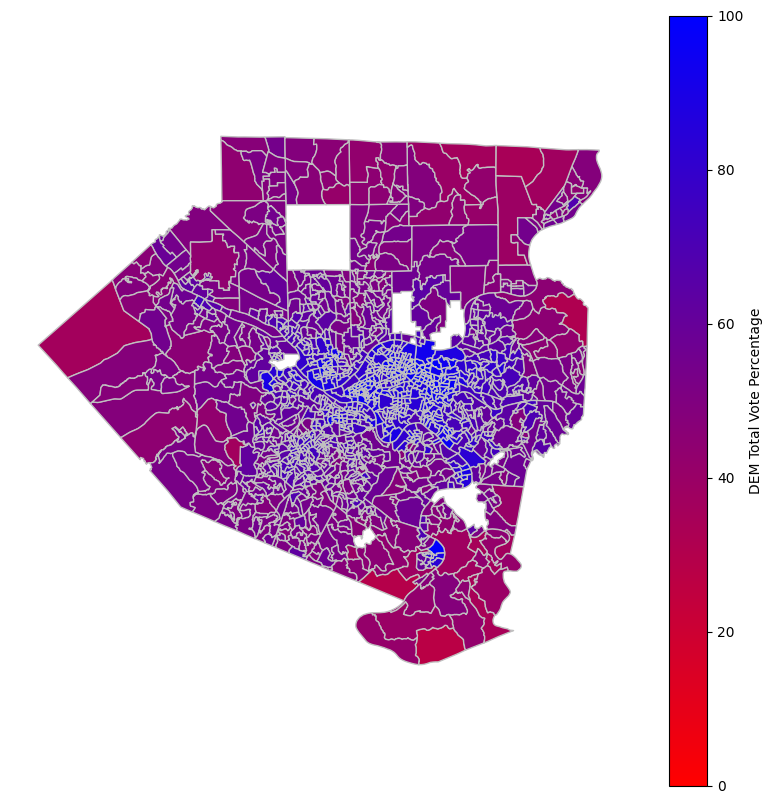

In [79]:
# Create a custom colormap from red to blue
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('red_to_blue', ['red', 'blue'])

# Modify the code to use the custom colormap
labeled_allegheny_general22_USSen_breakdown_map = allegheny_general22_USSen_breakdown_map.plot(column="DEM Total Vote Percentage", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "DEM Total Vote Percentage"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                       cmap=cmap, #Use the custom colormap
                       vmin=0,
                       vmax=100
                    )

# hide the x and y axis on the plot & move the legend
labeled_allegheny_general22_USSen_breakdown_map.axis('off')

plt.show()

##### HD32

###### Vote Type (Democratic)

In [156]:
hd32_general22_USSen_dem_mail_vote_ratio = (sum(hd32_general22_USSen_vote_breakdown['Absentee (DEM)']) / sum(hd32_general22_USSen_vote_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(hd32_general22_USSen_dem_mail_vote_ratio))

hd32_general22_USSen_dem_eday_vote_ratio = (sum(hd32_general22_USSen_vote_breakdown['Election Day (DEM)']) / sum(hd32_general22_USSen_vote_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(hd32_general22_USSen_dem_eday_vote_ratio))

hd32_general22_USSen_dem_provisional_vote_ratio = (sum(hd32_general22_USSen_vote_breakdown['Provisional (DEM)']) / sum(hd32_general22_USSen_vote_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(hd32_general22_USSen_dem_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 39.01352104117081
Mail-in/Election Day Vote percentage: 59.14822504684256
Mail-in/Provisional Vote percentage: 1.8382539119866308


###### Vote Type (Republican)

In [157]:
hd32_general22_USSen_gop_mail_vote_ratio = (sum(hd32_general22_USSen_vote_breakdown['Absentee (GOP)']) / sum(hd32_general22_USSen_vote_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(hd32_general22_USSen_gop_mail_vote_ratio))

hd32_general22_USSen_gop_eday_vote_ratio = (sum(hd32_general22_USSen_vote_breakdown['Election Day (GOP)']) / sum(hd32_general22_USSen_vote_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(hd32_general22_USSen_gop_eday_vote_ratio))

hd32_general22_USSen_gop_provisional_vote_ratio = (sum(hd32_general22_USSen_vote_breakdown['Provisional (GOP)']) / sum(hd32_general22_USSen_vote_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(hd32_general22_USSen_gop_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 11.925150650174437
Mail-in/Election Day Vote percentage: 87.29252563695951
Mail-in/Provisional Vote percentage: 0.7823237128660535


###### Partisan Vote Split

In [159]:
hd32_general22_USSen_dem_vote_ratio = (sum(hd32_general22_USSen_vote_breakdown['Total Votes (DEM)']) / sum(hd32_general22_USSen_vote_breakdown['Total'])) * 100
print("DEM Vote percentage: " + str(hd32_general22_USSen_dem_vote_ratio))

hd32_general22_USSen_gop_vote_ratio = (sum(hd32_general22_USSen_vote_breakdown['Total Votes (GOP)']) / sum(hd32_general22_USSen_vote_breakdown['Total'])) * 100
print("GOP Vote percentage: " + str(hd32_general22_USSen_gop_vote_ratio))

hd32_general22_USSen_other_vote_ratio = (sum(hd32_general22_USSen_vote_breakdown['Total Votes (Other)']) / sum(hd32_general22_USSen_vote_breakdown['Total'])) * 100
print("Other Vote percentage: " + str(hd32_general22_USSen_other_vote_ratio))

DEM Vote percentage: 66.41665545540158
GOP Vote percentage: 31.8142069151083
Other Vote percentage: 0.18498587380600026


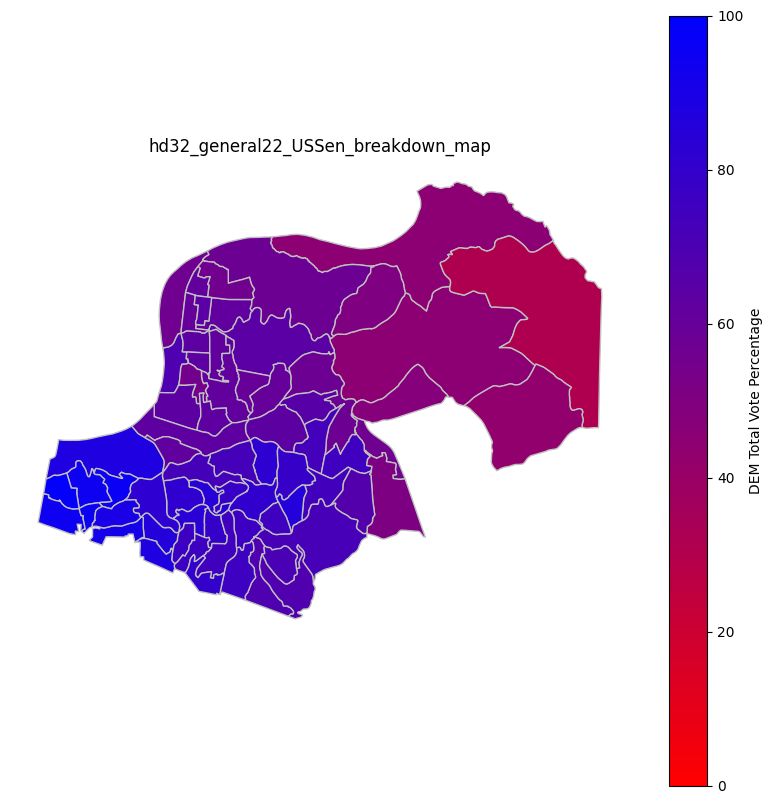

In [161]:
# Create a custom colormap from red to blue
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('red_to_blue', ['red', 'blue'])

# Modify the code to use the custom colormap
labeled_hd32_general22_USSen_breakdown_map = hd32_general22_USSen_breakdown_map.plot(column="DEM Total Vote Percentage", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "DEM Total Vote Percentage"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                       cmap=cmap, #Use the custom colormap
                       vmin=0,
                       vmax=100
                    )

# hide the x and y axis on the plot & move the legend
labeled_hd32_general22_USSen_breakdown_map.set_axis_off()
labeled_hd32_general22_USSen_breakdown_map.set_title("hd32_general22_USSen_breakdown_map")

plt.show()

### HD32 2023 Special Election

In [80]:
hd32_special_breakdown = hd32_special_breakdown_dict.get(list(hd32_special_breakdown_dict.keys())[0])

# format the column names for hd32_special_breakdown
hd32_special_breakdown_columns = ['County', 'Registered Voters', 'Election Day (DEM)', 'Absentee (DEM)', 'Provisional (DEM)', 'Total Votes (DEM)', 'Election Day (GOP)', 'Absentee (GOP)', 'Provisional (GOP)', 'Total Votes (GOP)', 'Election Day (Other)', 'Absentee (Other)', 'Provisional (Other)', 'Total Votes (Other)', 'Total']
hd32_special_breakdown.columns = hd32_special_breakdown_columns

# convert all but the first column from strings to integers
for col in hd32_special_breakdown_columns:
    if (col != 'County'):
        hd32_special_breakdown[col] = hd32_special_breakdown[col].astype(int)

##### Districtwide

In [81]:
# calculate the percentage of turnout by party for each district, then add that to the df
hd32_special_breakdown = hd32_special_breakdown.assign(**{
    'DEM Total Vote Percentage': lambda x: (x['Total Votes (DEM)'] / x['Total'])*100,
    'GOP Total Vote Percentage': lambda x: (x['Total Votes (GOP)'] / x['Total'])*100,
    'Other Total Vote Percentage': lambda x: (x['Total Votes (Other)'] / x['Total'])*100
})

hd32_special_breakdown

,County,Registered Voters,Election Day (DEM),Absentee (DEM),Provisional (DEM),Total Votes (DEM),Election Day (GOP),Absentee (GOP),Provisional (GOP),Total Votes (GOP),Election Day (Other),Absentee (Other),Provisional (Other),Total Votes (Other),Total,DEM Total Vote Percentage,GOP Total Vote Percentage,Other Total Vote Percentage
0,Oakmont Dist 1,843,135,104,3,242,75,11,0,86,0,0,0,0,328,73.780488,26.219512,0.000000
1,Oakmont Dist 2,1038,102,132,2,236,84,28,0,112,1,0,0,1,349,67.621777,32.091691,0.286533
2,Oakmont Dist 3,750,109,71,3,183,52,7,0,59,0,1,0,1,243,75.308642,24.279835,0.411523
3,Oakmont Dist 4,849,96,87,0,183,60,9,1,70,0,0,0,0,253,72.332016,27.667984,0.000000
4,Oakmont Dist 5,645,92,55,2,149,36,8,0,44,0,1,0,1,194,76.804124,22.680412,0.515464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Plum Dist 21,423,23,26,0,49,49,11,0,60,0,0,0,0,109,44.954128,55.045872,0.000000
65,Verona Dist 1,494,54,39,1,94,14,2,0,16,1,0,0,1,111,84.684685,14.414414,0.900901
66,Verona Dist 2,561,69,48,0,117,32,2,0,34,1,0,0,1,152,76.973684,22.368421,0.657895
67,Verona Dist 3,571,66,45,2,113,37,8,0,45,1,0,0,1,159,71.069182,28.301887,0.628931


In [82]:
# Create the data splits for each municipality/borough in HD32

# get Penn Hills wards/precincts
ph_special23_vote_breakdown = hd32_special_breakdown[hd32_special_breakdown['County'].str.contains("Penn Hills")]
ph_special23_vote_breakdown = ph_special23_vote_breakdown.reset_index(drop=True)

# get the Verona wards/precincts
verona_special23_vote_breakdown = hd32_special_breakdown[hd32_special_breakdown['County'].str.contains("Verona")]
verona_special23_vote_breakdown = verona_special23_vote_breakdown.reset_index(drop=True)

# get the Oakmont wards/precincts
oakmont_special23_vote_breakdown = hd32_special_breakdown[hd32_special_breakdown['County'].str.contains("Oakmont")]
oakmont_special23_vote_breakdown = oakmont_special23_vote_breakdown.reset_index(drop=True)

# get the Plum wards/precincts
plum_special23_vote_breakdown = hd32_special_breakdown[hd32_special_breakdown['County'].str.contains("Plum")]
plum_special23_vote_breakdown = plum_special23_vote_breakdown.reset_index(drop=True)

In [83]:
# link the election results to the map
hd32_special23_breakdown_map = hd32_district_map.merge(hd32_special_breakdown, how='left', left_on='Muni_War_1', right_on='County')
ph_special23_breakdown_map = ph_district_map.merge(ph_special23_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")
verona_special23_breakdown_map = verona_district_map.merge(verona_special23_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")
oakmont_special23_breakdown_map = oakmont_district_map.merge(oakmont_special23_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")
plum_special23_breakdown_map = plum_district_map.merge(plum_special23_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")

###### Vote Type (Democratic)

In [84]:
special23_dem_mail_vote_ratio = (sum(hd32_special_breakdown['Absentee (DEM)']) / sum(hd32_special_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(special23_dem_mail_vote_ratio))

special23_dem_eday_vote_ratio = (sum(hd32_special_breakdown['Election Day (DEM)']) / sum(hd32_special_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(special23_dem_eday_vote_ratio))

special23_dem_provisional_vote_ratio = (sum(hd32_special_breakdown['Provisional (DEM)']) / sum(hd32_special_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(special23_dem_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 57.809246147438564
Mail-in/Election Day Vote percentage: 41.316118284048315
Mail-in/Provisional Vote percentage: 0.8746355685131195


###### Vote Type (Republican)

In [85]:
special23_gop_mail_vote_ratio = (sum(hd32_special_breakdown['Absentee (GOP)']) / sum(hd32_special_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(special23_gop_mail_vote_ratio))

special23_gop_eday_vote_ratio = (sum(hd32_special_breakdown['Election Day (GOP)']) / sum(hd32_special_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(special23_gop_eday_vote_ratio))

special23_gop_provisional_vote_ratio = (sum(hd32_special_breakdown['Provisional (GOP)']) / sum(hd32_special_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(special23_gop_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 21.09546165884194
Mail-in/Election Day Vote percentage: 78.62284820031299
Mail-in/Provisional Vote percentage: 0.28169014084507044


###### Partisan Vote Split

In [86]:
special23_dem_vote_ratio = (sum(hd32_special_breakdown['Total Votes (DEM)']) / sum(hd32_special_breakdown['Total'])) * 100
print("DEM Vote percentage: " + str(special23_dem_vote_ratio))

special23_gop_vote_ratio = (sum(hd32_special_breakdown['Total Votes (GOP)']) / sum(hd32_special_breakdown['Total'])) * 100
print("GOP Vote percentage: " + str(special23_gop_vote_ratio))

special23_other_vote_ratio = (sum(hd32_special_breakdown['Total Votes (Other)']) / sum(hd32_special_breakdown['Total'])) * 100
print("Other Vote percentage: " + str(special23_other_vote_ratio))

DEM Vote percentage: 74.64055335354006
GOP Vote percentage: 24.830962928421542
Other Vote percentage: 0.5284837180383928


###### DEM Vote Lean Map

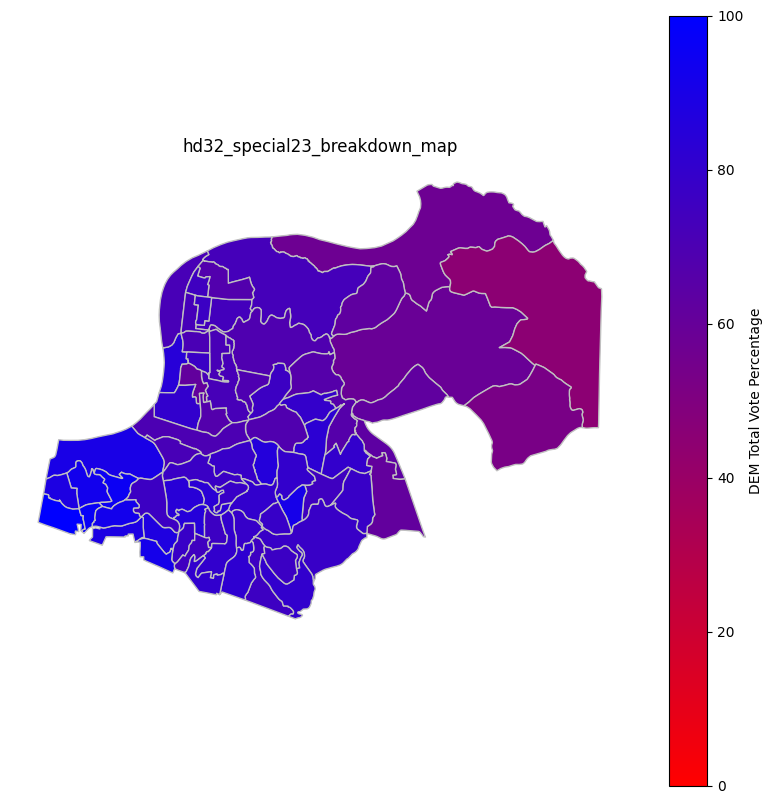

In [146]:
# Create a custom colormap from red to blue
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('red_to_blue', ['red', 'blue'])

# Modify the code to use the custom colormap
labeled_hd32_special23_breakdown_map = hd32_special23_breakdown_map.plot(column="DEM Total Vote Percentage", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "DEM Total Vote Percentage"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                       cmap=cmap, #Use the custom colormap
                       vmin=0,
                       vmax=100
                    )

# hide the x and y axis on the plot & move the legend
labeled_hd32_special23_breakdown_map.set_axis_off()
labeled_hd32_special23_breakdown_map.set_title("hd32_special23_breakdown_map")

plt.show()

##### Oakmont

In [88]:
# get only Oakmont wards/districts
oakmont_special23_breakdown = hd32_special_breakdown[hd32_special_breakdown['County'].str.contains("Oakmont")]
oakmont_special23_breakdown = oakmont_special23_breakdown.reset_index(drop=True)
oakmont_special23_breakdown

,County,Registered Voters,Election Day (DEM),Absentee (DEM),Provisional (DEM),Total Votes (DEM),Election Day (GOP),Absentee (GOP),Provisional (GOP),Total Votes (GOP),Election Day (Other),Absentee (Other),Provisional (Other),Total Votes (Other),Total,DEM Total Vote Percentage,GOP Total Vote Percentage,Other Total Vote Percentage
0,Oakmont Dist 1,843,135,104,3,242,75,11,0,86,0,0,0,0,328,73.780488,26.219512,0.000000
1,Oakmont Dist 2,1038,102,132,2,236,84,28,0,112,1,0,0,1,349,67.621777,32.091691,0.286533
2,Oakmont Dist 3,750,109,71,3,183,52,7,0,59,0,1,0,1,243,75.308642,24.279835,0.411523
3,Oakmont Dist 4,849,96,87,0,183,60,9,1,70,0,0,0,0,253,72.332016,27.667984,0.000000
4,Oakmont Dist 5,645,92,55,2,149,36,8,0,44,0,1,0,1,194,76.804124,22.680412,0.515464
5,Oakmont Dist 6,1285,103,182,0,285,85,26,0,111,1,1,0,2,398,71.608040,27.889447,0.502513


###### Vote Type (Democratic)

In [89]:
special23_dem_mail_vote_ratio = (sum(oakmont_special23_breakdown['Absentee (DEM)']) / sum(oakmont_special23_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(special23_dem_mail_vote_ratio))

special23_dem_eday_vote_ratio = (sum(oakmont_special23_breakdown['Election Day (DEM)']) / sum(oakmont_special23_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(special23_dem_eday_vote_ratio))

special23_dem_provisional_vote_ratio = (sum(oakmont_special23_breakdown['Provisional (DEM)']) / sum(oakmont_special23_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(special23_dem_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 49.37402190923318
Mail-in/Election Day Vote percentage: 49.84350547730829
Mail-in/Provisional Vote percentage: 0.7824726134585289


###### Vote Type (Republican)

In [90]:
special23_gop_mail_vote_ratio = (sum(oakmont_special23_breakdown['Absentee (GOP)']) / sum(oakmont_special23_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(special23_gop_mail_vote_ratio))

special23_gop_eday_vote_ratio = (sum(oakmont_special23_breakdown['Election Day (GOP)']) / sum(oakmont_special23_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(special23_gop_eday_vote_ratio))

special23_gop_provisional_vote_ratio = (sum(oakmont_special23_breakdown['Provisional (GOP)']) / sum(oakmont_special23_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(special23_gop_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 18.464730290456433
Mail-in/Election Day Vote percentage: 81.32780082987551
Mail-in/Provisional Vote percentage: 0.2074688796680498


###### Partisan Vote Split

In [91]:
special23_dem_vote_ratio = (sum(oakmont_special23_breakdown['Total Votes (DEM)']) / sum(oakmont_special23_breakdown['Total'])) * 100
print("DEM Vote percentage: " + str(special23_dem_vote_ratio))

special23_gop_vote_ratio = (sum(oakmont_special23_breakdown['Total Votes (GOP)']) / sum(oakmont_special23_breakdown['Total'])) * 100
print("GOP Vote percentage: " + str(special23_gop_vote_ratio))

special23_other_vote_ratio = (sum(oakmont_special23_breakdown['Total Votes (Other)']) / sum(oakmont_special23_breakdown['Total'])) * 100
print("Other Vote percentage: " + str(special23_other_vote_ratio))

DEM Vote percentage: 72.40793201133144
GOP Vote percentage: 27.308781869688385
Other Vote percentage: 0.28328611898017


###### Percentage of Districtwide

In [92]:
special23_total_vote_district_ratio = (sum(oakmont_special23_breakdown['Total']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage: " + str(special23_total_vote_district_ratio))

special23_dem_vote_district_ratio = (sum(oakmont_special23_breakdown['Total Votes (DEM)']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage (DEM): " + str(special23_dem_vote_district_ratio))

special23_gop_vote_district_ratio = (sum(oakmont_special23_breakdown['Total Votes (GOP)']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage (GOP): " + str(special23_gop_vote_district_ratio))

special23_other_vote_district_ratio = (sum(oakmont_special23_breakdown['Total Votes (Other)']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage (Other): " + str(special23_other_vote_district_ratio))

HD32 Vote percentage: 13.71726121084946
HD32 Vote percentage (DEM): 9.932385171368617
HD32 Vote percentage (GOP): 3.746016942566255
HD32 Vote percentage (Other): 0.03885909691458771


###### DEM Vote Lean Map

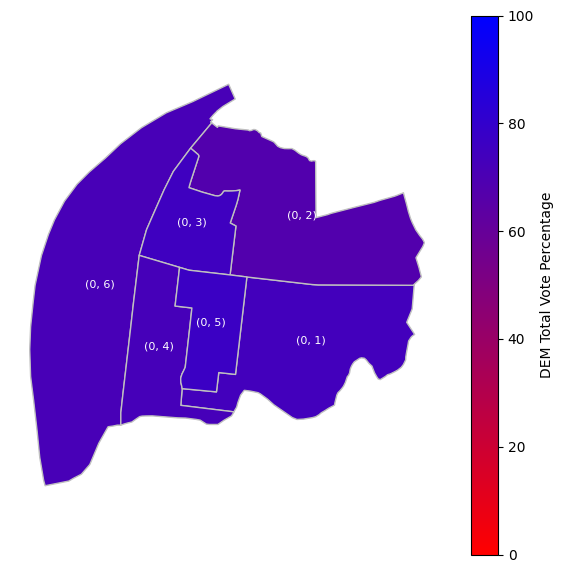

In [93]:
labeled_oakmont_special23_breakdown_map = oakmont_special23_breakdown_map.plot(column="DEM Total Vote Percentage", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "DEM Total Vote Percentage"}, #Label the legend
                       figsize=(7,7), #Set the size of the graph
                       cmap=cmap, #Use the custom colormap
                       vmin=0,
                       vmax=100
                    )

# label each of the districts
for idx, row in oakmont_special23_breakdown_map.iterrows():
    ward = row['WARD_1']
    district = row['DISTRICT_1']
    label = f'({ward}, {district})'
    color = 'white'
    labeled_oakmont_special23_breakdown_map.annotate(label, xy=row.geometry.centroid.coords[0], ha='center', fontsize=8, color=color)

# hide the x and y axis on the plot & move the legend
labeled_oakmont_special23_breakdown_map.axis('off')

plt.show()

#### Penn Hills

In [94]:
# get only Penn Hills wards/districts
ph_special23_breakdown = hd32_special_breakdown[hd32_special_breakdown['County'].str.contains("Penn Hills")]
ph_special23_breakdown = ph_special23_breakdown.reset_index(drop=True)
if not os.path.exists("ph_special23_breakdown.xlsx"):
    ph_special23_breakdown.to_excel("ph_special23_breakdown.xlsx", index=False)
ph_special23_breakdown.head(5)

,County,Registered Voters,Election Day (DEM),Absentee (DEM),Provisional (DEM),Total Votes (DEM),Election Day (GOP),Absentee (GOP),Provisional (GOP),Total Votes (GOP),Election Day (Other),Absentee (Other),Provisional (Other),Total Votes (Other),Total,DEM Total Vote Percentage,GOP Total Vote Percentage,Other Total Vote Percentage
0,Penn Hills Ward 1 Dist 1,684,50,119,2,171,6,2,0,8,0,0,0,0,179,95.530726,4.469274,0.000000
1,Penn Hills Ward 1 Dist 2,710,69,102,0,171,7,6,0,13,0,0,0,0,184,92.934783,7.065217,0.000000
2,Penn Hills Ward 1 Dist 3,449,30,54,4,88,2,1,0,3,0,0,0,0,91,96.703297,3.296703,0.000000
3,Penn Hills Ward 1 Dist 4,304,16,37,0,53,0,0,0,0,0,0,0,0,53,100.000000,0.000000,0.000000
4,Penn Hills Ward 1 Dist 5,188,14,25,0,39,2,1,0,3,1,1,0,2,44,88.636364,6.818182,4.545455


###### Vote Type (Democratic)

In [95]:
special23_dem_mail_vote_ratio = (sum(ph_special23_breakdown['Absentee (DEM)']) / sum(ph_special23_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(special23_dem_mail_vote_ratio))

special23_dem_eday_vote_ratio = (sum(ph_special23_breakdown['Election Day (DEM)']) / sum(ph_special23_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(special23_dem_eday_vote_ratio))

special23_dem_provisional_vote_ratio = (sum(ph_special23_breakdown['Provisional (DEM)']) / sum(ph_special23_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(special23_dem_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 59.41248846508766
Mail-in/Election Day Vote percentage: 39.69547831436481
Mail-in/Provisional Vote percentage: 0.8920332205475239


###### Vote Type (Republican)

In [96]:
special23_gop_mail_vote_ratio = (sum(ph_special23_breakdown['Absentee (GOP)']) / sum(ph_special23_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(special23_gop_mail_vote_ratio))

special23_gop_eday_vote_ratio = (sum(ph_special23_breakdown['Election Day (GOP)']) / sum(ph_special23_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(special23_gop_eday_vote_ratio))

special23_gop_provisional_vote_ratio = (sum(ph_special23_breakdown['Provisional (GOP)']) / sum(ph_special23_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(special23_gop_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 22.555488902219555
Mail-in/Election Day Vote percentage: 77.08458308338332
Mail-in/Provisional Vote percentage: 0.3599280143971206


###### Partisan Vote Split

In [97]:
special23_dem_vote_ratio = (sum(ph_special23_breakdown['Total Votes (DEM)']) / sum(ph_special23_breakdown['Total'])) * 100
print("DEM Vote percentage: " + str(special23_dem_vote_ratio))

special23_gop_vote_ratio = (sum(ph_special23_breakdown['Total Votes (GOP)']) / sum(ph_special23_breakdown['Total'])) * 100
print("GOP Vote percentage: " + str(special23_gop_vote_ratio))

special23_other_vote_ratio = (sum(ph_special23_breakdown['Total Votes (Other)']) / sum(ph_special23_breakdown['Total'])) * 100
print("Other Vote percentage: " + str(special23_other_vote_ratio))

DEM Vote percentage: 79.0612840466926
GOP Vote percentage: 20.269941634241246
Other Vote percentage: 0.6687743190661478


###### Percentage of Districtwide

In [98]:
special23_total_vote_district_ratio = (sum(ph_special23_breakdown['Total']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage: " + str(special23_total_vote_district_ratio))

special23_dem_vote_district_ratio = (sum(ph_special23_breakdown['Total Votes (DEM)']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage (DEM): " + str(special23_dem_vote_district_ratio))

special23_gop_vote_district_ratio = (sum(ph_special23_breakdown['Total Votes (GOP)']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage (GOP): " + str(special23_gop_vote_district_ratio))

special23_other_vote_district_ratio = (sum(ph_special23_breakdown['Total Votes (Other)']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage (Other): " + str(special23_other_vote_district_ratio))

HD32 Vote percentage: 63.91544260511386
HD32 Vote percentage (DEM): 50.53236962772986
HD32 Vote percentage (GOP): 12.955622911323541
HD32 Vote percentage (Other): 0.42745006606046476


###### DEM Vote Lean Map

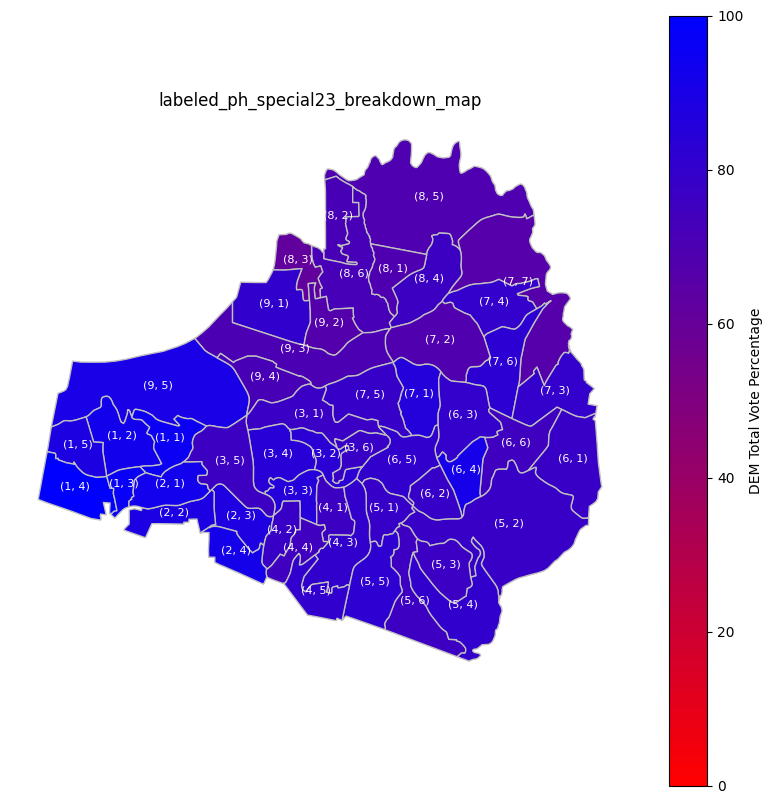

In [145]:
labeled_ph_special23_breakdown_map = ph_special23_breakdown_map.plot(column="DEM Total Vote Percentage", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "DEM Total Vote Percentage"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                       cmap=cmap, #Use the custom colormap
                       vmin=0,
                       vmax=100
                    )

# label each of the districts
for idx, row in ph_special23_breakdown_map.iterrows():
    ward = row['WARD_1']
    district = row['DISTRICT_1']
    label = f'({ward}, {district})'
    color = 'white'
    labeled_ph_special23_breakdown_map.annotate(label, xy=row.geometry.centroid.coords[0], ha='center', fontsize=8, color=color)

# hide the x and y axis on the plot & move the legend
labeled_ph_special23_breakdown_map.set_axis_off()
labeled_ph_special23_breakdown_map.set_title("labeled_ph_special23_breakdown_map")

plt.show()

#### Plum

In [100]:
# get only Plum wards/districts
plum_special23_breakdown = hd32_special_breakdown[hd32_special_breakdown['County'].str.contains("Plum")]
plum_special23_breakdown = plum_special23_breakdown.reset_index(drop=True)
plum_special23_breakdown.head(5)

,County,Registered Voters,Election Day (DEM),Absentee (DEM),Provisional (DEM),Total Votes (DEM),Election Day (GOP),Absentee (GOP),Provisional (GOP),Total Votes (GOP),Election Day (Other),Absentee (Other),Provisional (Other),Total Votes (Other),Total,DEM Total Vote Percentage,GOP Total Vote Percentage,Other Total Vote Percentage
0,Plum Dist 1,1744,74,182,0,256,110,43,0,153,0,0,0,0,409,62.591687,37.408313,0.000000
1,Plum Dist 2,622,38,44,1,83,48,13,0,61,1,0,0,1,145,57.241379,42.068966,0.689655
2,Plum Dist 3,1008,113,137,7,257,64,31,1,96,0,0,0,0,353,72.804533,27.195467,0.000000
3,Plum Dist 7,1200,70,113,2,185,88,27,1,116,0,0,0,0,301,61.461794,38.538206,0.000000
4,Plum Dist 17,646,44,65,1,110,58,5,0,63,0,0,0,0,173,63.583815,36.416185,0.000000


###### Vote Type (Democratic)

In [101]:
special23_dem_mail_vote_ratio = (sum(plum_special23_breakdown['Absentee (DEM)']) / sum(plum_special23_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(special23_dem_mail_vote_ratio))

special23_dem_eday_vote_ratio = (sum(plum_special23_breakdown['Election Day (DEM)']) / sum(plum_special23_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(special23_dem_eday_vote_ratio))

special23_dem_provisional_vote_ratio = (sum(plum_special23_breakdown['Provisional (DEM)']) / sum(plum_special23_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(special23_dem_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 61.73333333333333
Mail-in/Election Day Vote percentage: 37.4
Mail-in/Provisional Vote percentage: 0.8666666666666666


###### Vote Type (Republican)

In [102]:
special23_gop_mail_vote_ratio = (sum(plum_special23_breakdown['Absentee (GOP)']) / sum(plum_special23_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(special23_gop_mail_vote_ratio))

special23_gop_eday_vote_ratio = (sum(plum_special23_breakdown['Election Day (GOP)']) / sum(plum_special23_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(special23_gop_eday_vote_ratio))

special23_gop_provisional_vote_ratio = (sum(plum_special23_breakdown['Provisional (GOP)']) / sum(plum_special23_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(special23_gop_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 20.715036803364878
Mail-in/Election Day Vote percentage: 79.07465825446897
Mail-in/Provisional Vote percentage: 0.2103049421661409


###### Partisan Vote Split

In [103]:
special23_dem_vote_ratio = (sum(plum_special23_breakdown['Total Votes (DEM)']) / sum(plum_special23_breakdown['Total'])) * 100
print("DEM Vote percentage: " + str(special23_dem_vote_ratio))

special23_gop_vote_ratio = (sum(plum_special23_breakdown['Total Votes (GOP)']) / sum(plum_special23_breakdown['Total'])) * 100
print("GOP Vote percentage: " + str(special23_gop_vote_ratio))

special23_other_vote_ratio = (sum(plum_special23_breakdown['Total Votes (Other)']) / sum(plum_special23_breakdown['Total'])) * 100
print("Other Vote percentage: " + str(special23_other_vote_ratio))

DEM Vote percentage: 61.07491856677525
GOP Vote percentage: 38.72149837133551
Other Vote percentage: 0.20358306188925082


###### Percentage of Districtwide

In [104]:
special23_total_vote_district_ratio = (sum(plum_special23_breakdown['Total']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage: " + str(special23_total_vote_district_ratio))

special23_dem_vote_district_ratio = (sum(plum_special23_breakdown['Total Votes (DEM)']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage (DEM): " + str(special23_dem_vote_district_ratio))

special23_gop_vote_district_ratio = (sum(plum_special23_breakdown['Total Votes (GOP)']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage (GOP): " + str(special23_gop_vote_district_ratio))

special23_other_vote_district_ratio = (sum(plum_special23_breakdown['Total Votes (Other)']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage (Other): " + str(special23_other_vote_district_ratio))

HD32 Vote percentage: 19.08758840444548
HD32 Vote percentage (DEM): 11.657729074376313
HD32 Vote percentage (GOP): 7.391000233154582
HD32 Vote percentage (Other): 0.03885909691458771


###### DEM Vote Lean Map

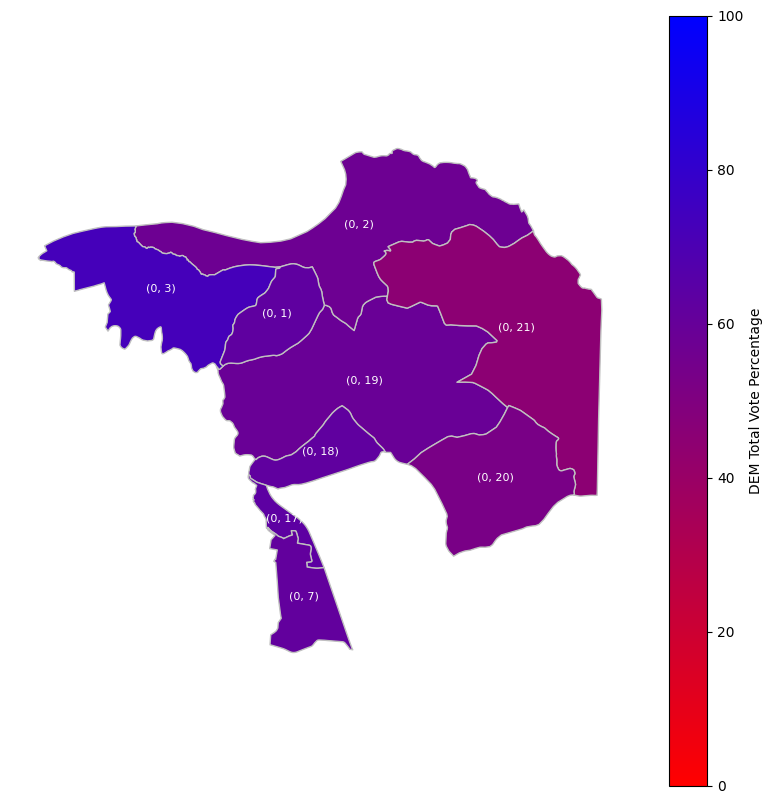

In [105]:
labeled_plum_special23_breakdown_map = plum_special23_breakdown_map.plot(column="DEM Total Vote Percentage", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "DEM Total Vote Percentage"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                       cmap=cmap, #Use the custom colormap
                       vmin=0,
                       vmax=100
                    )

# label each of the districts
for idx, row in plum_special23_breakdown_map.iterrows():
    ward = row['WARD_1']
    district = row['DISTRICT_1']
    label = f'({ward}, {district})'
    color = 'white'
    labeled_plum_special23_breakdown_map.annotate(label, xy=row.geometry.centroid.coords[0], ha='center', fontsize=8, color=color)

# hide the x and y axis on the plot & move the legend
labeled_plum_special23_breakdown_map.axis('off')

plt.show()

#### Verona

In [106]:
# get only Verona wards/districts
verona_special23_breakdown = hd32_special_breakdown[hd32_special_breakdown['County'].str.contains("Verona")]
verona_special23_breakdown = verona_special23_breakdown.reset_index(drop=True)
verona_special23_breakdown.head(5)

,County,Registered Voters,Election Day (DEM),Absentee (DEM),Provisional (DEM),Total Votes (DEM),Election Day (GOP),Absentee (GOP),Provisional (GOP),Total Votes (GOP),Election Day (Other),Absentee (Other),Provisional (Other),Total Votes (Other),Total,DEM Total Vote Percentage,GOP Total Vote Percentage,Other Total Vote Percentage
0,Verona Dist 1,494,54,39,1,94,14,2,0,16,1,0,0,1,111,84.684685,14.414414,0.900901
1,Verona Dist 2,561,69,48,0,117,32,2,0,34,1,0,0,1,152,76.973684,22.368421,0.657895
2,Verona Dist 3,571,66,45,2,113,37,8,0,45,1,0,0,1,159,71.069182,28.301887,0.628931


###### Vote Type (Democratic)

In [107]:
special23_dem_mail_vote_ratio = (sum(verona_special23_breakdown['Absentee (DEM)']) / sum(verona_special23_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(special23_dem_mail_vote_ratio))

special23_dem_eday_vote_ratio = (sum(verona_special23_breakdown['Election Day (DEM)']) / sum(verona_special23_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(special23_dem_eday_vote_ratio))

special23_dem_provisional_vote_ratio = (sum(verona_special23_breakdown['Provisional (DEM)']) / sum(verona_special23_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(special23_dem_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 40.74074074074074
Mail-in/Election Day Vote percentage: 58.333333333333336
Mail-in/Provisional Vote percentage: 0.9259259259259258


###### Vote Type (Republican)

In [108]:
special23_gop_mail_vote_ratio = (sum(verona_special23_breakdown['Absentee (GOP)']) / sum(verona_special23_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(special23_gop_mail_vote_ratio))

special23_gop_eday_vote_ratio = (sum(verona_special23_breakdown['Election Day (GOP)']) / sum(verona_special23_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(special23_gop_eday_vote_ratio))

special23_gop_provisional_vote_ratio = (sum(verona_special23_breakdown['Provisional (GOP)']) / sum(verona_special23_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(special23_gop_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 12.631578947368421
Mail-in/Election Day Vote percentage: 87.36842105263159
Mail-in/Provisional Vote percentage: 0.0


###### Partisan Vote Split

In [109]:
special23_dem_vote_ratio = (sum(verona_special23_breakdown['Total Votes (DEM)']) / sum(verona_special23_breakdown['Total'])) * 100
print("DEM Vote percentage: " + str(special23_dem_vote_ratio))

special23_gop_vote_ratio = (sum(verona_special23_breakdown['Total Votes (GOP)']) / sum(verona_special23_breakdown['Total'])) * 100
print("GOP Vote percentage: " + str(special23_gop_vote_ratio))

special23_other_vote_ratio = (sum(verona_special23_breakdown['Total Votes (Other)']) / sum(verona_special23_breakdown['Total'])) * 100
print("Other Vote percentage: " + str(special23_other_vote_ratio))

DEM Vote percentage: 76.77725118483413
GOP Vote percentage: 22.511848341232227
Other Vote percentage: 0.7109004739336493


###### Percentage of Districtwide

In [110]:
special23_total_vote_district_ratio = (sum(verona_special23_breakdown['Total']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage: " + str(special23_total_vote_district_ratio))

special23_dem_vote_district_ratio = (sum(verona_special23_breakdown['Total Votes (DEM)']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage (DEM): " + str(special23_dem_vote_district_ratio))

special23_gop_vote_district_ratio = (sum(verona_special23_breakdown['Total Votes (GOP)']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage (GOP): " + str(special23_gop_vote_district_ratio))

special23_other_vote_district_ratio = (sum(verona_special23_breakdown['Total Votes (Other)']) / (hd32_special_breakdown['Total'][68])) * 100
print("HD32 Vote percentage (Other): " + str(special23_other_vote_district_ratio))

HD32 Vote percentage: 3.2797077795912024
HD32 Vote percentage (DEM): 2.518069480065283
HD32 Vote percentage (GOP): 0.7383228413771664
HD32 Vote percentage (Other): 0.023315458148752622


###### DEM Vote Lean Map

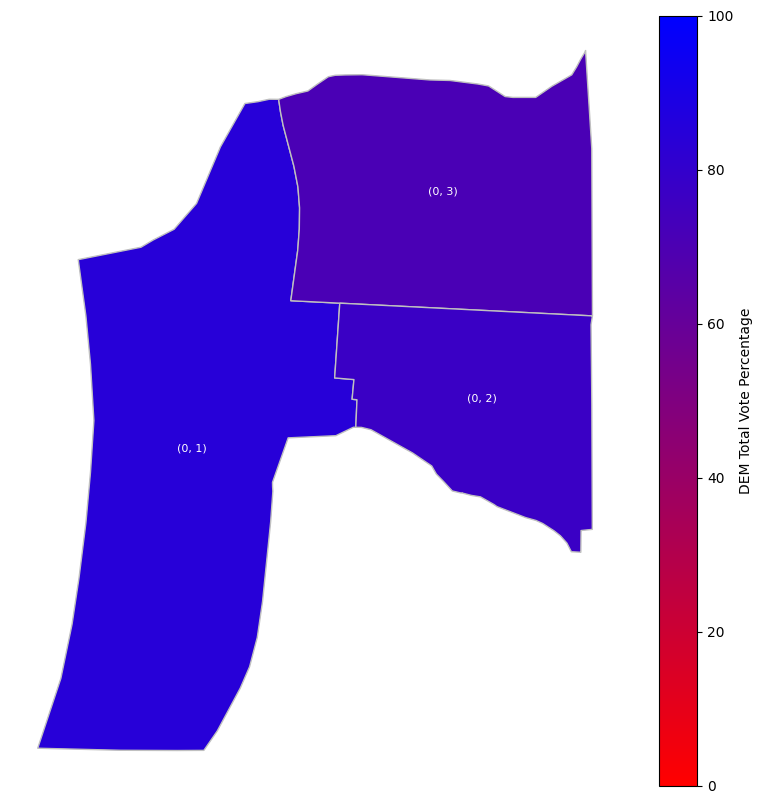

In [111]:
labeled_verona_special23_breakdown_map = verona_special23_breakdown_map.plot(column="DEM Total Vote Percentage", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "DEM Total Vote Percentage"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                       cmap=cmap, #Use the custom colormap
                       vmin=0,
                       vmax=100
                    )

# label each of the districts
for idx, row in verona_special23_breakdown_map.iterrows():
    ward = row['WARD_1']
    district = row['DISTRICT_1']
    label = f'({ward}, {district})'
    color = 'white'
    labeled_verona_special23_breakdown_map.annotate(label, xy=row.geometry.centroid.coords[0], ha='center', fontsize=8, color=color)

# hide the x and y axis on the plot & move the legend
labeled_verona_special23_breakdown_map.axis('off')

plt.show()

### 2023 DEM Primary Election

### 2023 General Election

#### County Executive

In [112]:
allegheny_general23_CountyExec_breakdown = allegheny_general23_breakdown_dict.get(list(allegheny_general23_breakdown_dict.keys())[4])

# format the column names
allegheny_general23_CountyExec_breakdown_columns = ['County', 'Registered Voters', 'Election Day (DEM)', 'Absentee (DEM)', 'Provisional (DEM)', 'Total Votes (DEM)', 'Election Day (GOP)', 'Absentee (GOP)', 'Provisional (GOP)', 'Total Votes (GOP)', 'Election Day (Other)', 'Absentee (Other)', 'Provisional (Other)', 'Total Votes (Other)', 'Total']
allegheny_general23_CountyExec_breakdown.columns = allegheny_general23_CountyExec_breakdown_columns

# convert all but the first column from strings to integers
for col in allegheny_general23_CountyExec_breakdown_columns:
    if (col != 'County'):
        allegheny_general23_CountyExec_breakdown[col] = allegheny_general23_CountyExec_breakdown[col].astype(int)

In [113]:
# calculate the percentage of turnout by party for each district, then add that to the df
allegheny_general23_CountyExec_breakdown = allegheny_general23_CountyExec_breakdown.assign(**{
    'DEM Total Vote Percentage': lambda x: (x['Total Votes (DEM)'] / x['Total'])*100,
    'GOP Total Vote Percentage': lambda x: (x['Total Votes (GOP)'] / x['Total'])*100,
    'Other Total Vote Percentage': lambda x: (x['Total Votes (Other)'] / x['Total'])*100
})

In [114]:
# Create the data splits for each municipality/borough in HD32
hd32_general23_CountyExec_vote_breakdown = allegheny_general23_CountyExec_breakdown[allegheny_general23_CountyExec_breakdown['County'].isin(hd32_districts[0])]
hd32_general23_CountyExec_vote_breakdown = hd32_general23_CountyExec_vote_breakdown.reset_index(drop=True)

# get Penn Hills wards/precincts
ph_general23_CountyExec_vote_breakdown = allegheny_general23_CountyExec_breakdown[allegheny_general23_CountyExec_breakdown['County'].str.contains("Penn Hills")]
ph_general23_CountyExec_vote_breakdown = ph_general23_CountyExec_vote_breakdown.reset_index(drop=True)
if not os.path.exists("ph_general23_CountyExec_vote_breakdown.xlsx"):
    ph_general23_CountyExec_vote_breakdown.to_excel("ph_general23_CountyExec_vote_breakdown.xlsx", index=False)

# get the Verona wards/precincts
verona_general23_CountyExec_vote_breakdown = allegheny_general23_CountyExec_breakdown[allegheny_general23_CountyExec_breakdown['County'].str.contains("Verona")]
verona_general23_CountyExec_vote_breakdown = verona_general23_CountyExec_vote_breakdown.reset_index(drop=True)

# get the Oakmont wards/precincts
oakmont_general23_CountyExec_vote_breakdown = allegheny_general23_CountyExec_breakdown[allegheny_general23_CountyExec_breakdown['County'].str.contains("Oakmont")]
oakmont_general23_CountyExec_vote_breakdown = oakmont_general23_CountyExec_vote_breakdown.reset_index(drop=True)

# get the Plum wards/precincts
plum_general23_CountyExec_vote_breakdown = allegheny_general23_CountyExec_breakdown[allegheny_general23_CountyExec_breakdown['County'].str.contains("Plum")]
plum_general23_CountyExec_vote_breakdown = plum_general23_CountyExec_vote_breakdown.reset_index(drop=True)

In [115]:
# link the election results to the map
#allegheny_general23_CountyExec_breakdown_map = allegheny_district_map.merge(allegheny_general23_CountyExec_breakdown, how='left', left_on='Muni_War_1', right_on='County')
hd32_general23_CountyExec_breakdown_map = hd32_district_map.merge(hd32_general23_CountyExec_vote_breakdown, how='left', left_on='Muni_War_1', right_on='County')
ph_general23_CountyExec_breakdown_map = ph_district_map.merge(ph_general23_CountyExec_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")
verona_general23_CountyExec_breakdown_map = verona_district_map.merge(verona_general23_CountyExec_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")
oakmont_general23_CountyExec_breakdown_map = oakmont_district_map.merge(oakmont_general23_CountyExec_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")
plum_general23_CountyExec_breakdown_map = plum_district_map.merge(plum_general23_CountyExec_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")

##### HD32

###### Vote Type (Democratic)

In [116]:
hd32_general23_CountyExec_dem_mail_vote_ratio = (sum(hd32_general23_CountyExec_vote_breakdown['Absentee (DEM)']) / sum(hd32_general23_CountyExec_vote_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(hd32_general23_CountyExec_dem_mail_vote_ratio))

hd32_general23_CountyExec_dem_eday_vote_ratio = (sum(hd32_general23_CountyExec_vote_breakdown['Election Day (DEM)']) / sum(hd32_general23_CountyExec_vote_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(hd32_general23_CountyExec_dem_eday_vote_ratio))

hd32_general23_CountyExec_dem_provisional_vote_ratio = (sum(hd32_general23_CountyExec_vote_breakdown['Provisional (DEM)']) / sum(hd32_general23_CountyExec_vote_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(hd32_general23_CountyExec_dem_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 43.75912053701722
Mail-in/Election Day Vote percentage: 55.56960793851542
Mail-in/Provisional Vote percentage: 0.6712715244673606


###### Vote Type (Republican)

In [117]:
hd32_general23_CountyExec_gop_mail_vote_ratio = (sum(hd32_general23_CountyExec_vote_breakdown['Absentee (GOP)']) / sum(hd32_general23_CountyExec_vote_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(hd32_general23_CountyExec_gop_mail_vote_ratio))

hd32_general23_CountyExec_gop_eday_vote_ratio = (sum(hd32_general23_CountyExec_vote_breakdown['Election Day (GOP)']) / sum(hd32_general23_CountyExec_vote_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(hd32_general23_CountyExec_gop_eday_vote_ratio))

hd32_general23_CountyExec_gop_provisional_vote_ratio = (sum(hd32_general23_CountyExec_vote_breakdown['Provisional (GOP)']) / sum(hd32_general23_CountyExec_vote_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(hd32_general23_CountyExec_gop_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 21.660830415207606
Mail-in/Election Day Vote percentage: 77.93896948474237
Mail-in/Provisional Vote percentage: 0.400200100050025


###### Partisan Vote Split

In [118]:
hd32_general23_CountyExec_dem_vote_ratio = (sum(hd32_general23_CountyExec_vote_breakdown['Total Votes (DEM)']) / sum(hd32_general23_CountyExec_vote_breakdown['Total'])) * 100
print("DEM Vote percentage: " + str(hd32_general23_CountyExec_dem_vote_ratio))

hd32_general23_CountyExec_gop_vote_ratio = (sum(hd32_general23_CountyExec_vote_breakdown['Total Votes (GOP)']) / sum(hd32_general23_CountyExec_vote_breakdown['Total'])) * 100
print("GOP Vote percentage: " + str(hd32_general23_CountyExec_gop_vote_ratio))

hd32_general23_CountyExec_other_vote_ratio = (sum(hd32_general23_CountyExec_vote_breakdown['Total Votes (Other)']) / sum(hd32_general23_CountyExec_vote_breakdown['Total'])) * 100
print("Other Vote percentage: " + str(hd32_general23_CountyExec_other_vote_ratio))

DEM Vote percentage: 56.18167905553126
GOP Vote percentage: 43.70354175776126
Other Vote percentage: 0.11477918670747705


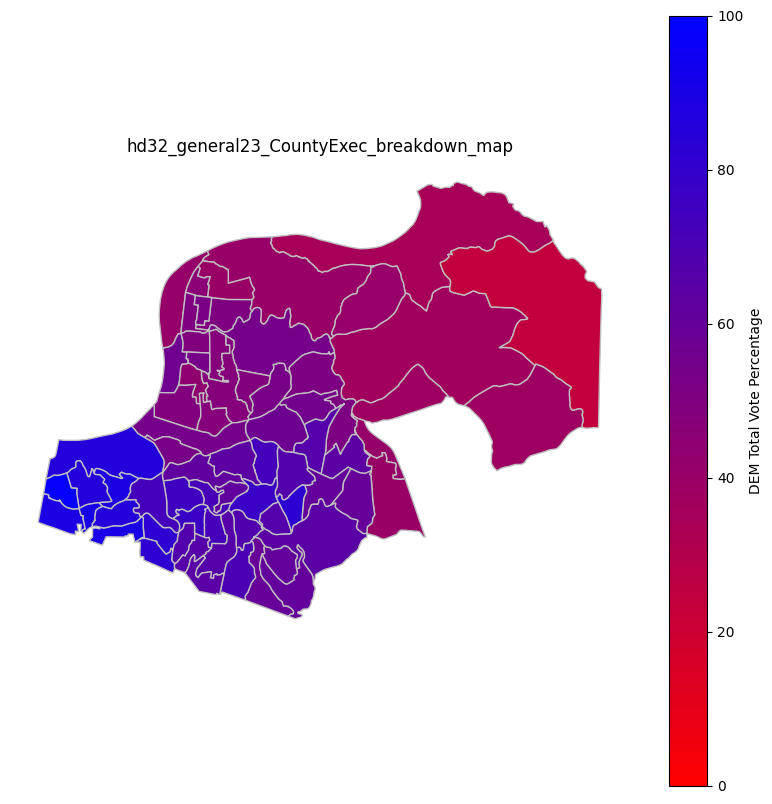

In [143]:
# Create a custom colormap from red to blue
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('red_to_blue', ['red', 'blue'])

# Modify the code to use the custom colormap
labeled_hd32_general23_CountyExec_breakdown_map = hd32_general23_CountyExec_breakdown_map.plot(column="DEM Total Vote Percentage", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "DEM Total Vote Percentage"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                       cmap=cmap, #Use the custom colormap
                       vmin=0,
                       vmax=100
                    )

# hide the x and y axis on the plot & move the legend
labeled_hd32_general23_CountyExec_breakdown_map.set_axis_off()
labeled_hd32_general23_CountyExec_breakdown_map.set_title("hd32_general23_CountyExec_breakdown_map")

plt.show()

##### Penn Hills

###### Vote Type (Democratic)

In [120]:
ph_general23_CountyExec_dem_mail_vote_ratio = (sum(ph_general23_CountyExec_vote_breakdown['Absentee (DEM)']) / sum(ph_general23_CountyExec_vote_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(ph_general23_CountyExec_dem_mail_vote_ratio))

ph_general23_CountyExec_dem_eday_vote_ratio = (sum(ph_general23_CountyExec_vote_breakdown['Election Day (DEM)']) / sum(ph_general23_CountyExec_vote_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(ph_general23_CountyExec_dem_eday_vote_ratio))

ph_general23_CountyExec_dem_provisional_vote_ratio = (sum(ph_general23_CountyExec_vote_breakdown['Provisional (DEM)']) / sum(ph_general23_CountyExec_vote_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(ph_general23_CountyExec_dem_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 44.42581726739313
Mail-in/Election Day Vote percentage: 54.79184129645153
Mail-in/Provisional Vote percentage: 0.7823414361553507


###### Vote Type (Republican)

In [121]:
ph_general23_CountyExec_gop_mail_vote_ratio = (sum(ph_general23_CountyExec_vote_breakdown['Absentee (GOP)']) / sum(ph_general23_CountyExec_vote_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(ph_general23_CountyExec_gop_mail_vote_ratio))

ph_general23_CountyExec_gop_eday_vote_ratio = (sum(ph_general23_CountyExec_vote_breakdown['Election Day (GOP)']) / sum(ph_general23_CountyExec_vote_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(ph_general23_CountyExec_gop_eday_vote_ratio))

ph_general23_CountyExec_gop_provisional_vote_ratio = (sum(ph_general23_CountyExec_vote_breakdown['Provisional (GOP)']) / sum(ph_general23_CountyExec_vote_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(ph_general23_CountyExec_gop_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 24.203480589022757
Mail-in/Election Day Vote percentage: 75.47523427041499
Mail-in/Provisional Vote percentage: 0.321285140562249


###### Partisan Vote Split

In [122]:
ph_general23_CountyExec_dem_vote_ratio = (sum(ph_general23_CountyExec_vote_breakdown['Total Votes (DEM)']) / sum(ph_general23_CountyExec_vote_breakdown['Total'])) * 100
print("DEM Vote percentage: " + str(ph_general23_CountyExec_dem_vote_ratio))

ph_general23_CountyExec_gop_vote_ratio = (sum(ph_general23_CountyExec_vote_breakdown['Total Votes (GOP)']) / sum(ph_general23_CountyExec_vote_breakdown['Total'])) * 100
print("GOP Vote percentage: " + str(ph_general23_CountyExec_gop_vote_ratio))

ph_general23_CountyExec_other_vote_ratio = (sum(ph_general23_CountyExec_vote_breakdown['Total Votes (Other)']) / sum(ph_general23_CountyExec_vote_breakdown['Total'])) * 100
print("Other Vote percentage: " + str(ph_general23_CountyExec_other_vote_ratio))

DEM Vote percentage: 65.63359618558592
GOP Vote percentage: 34.247203374289384
Other Vote percentage: 0.11920044012470199


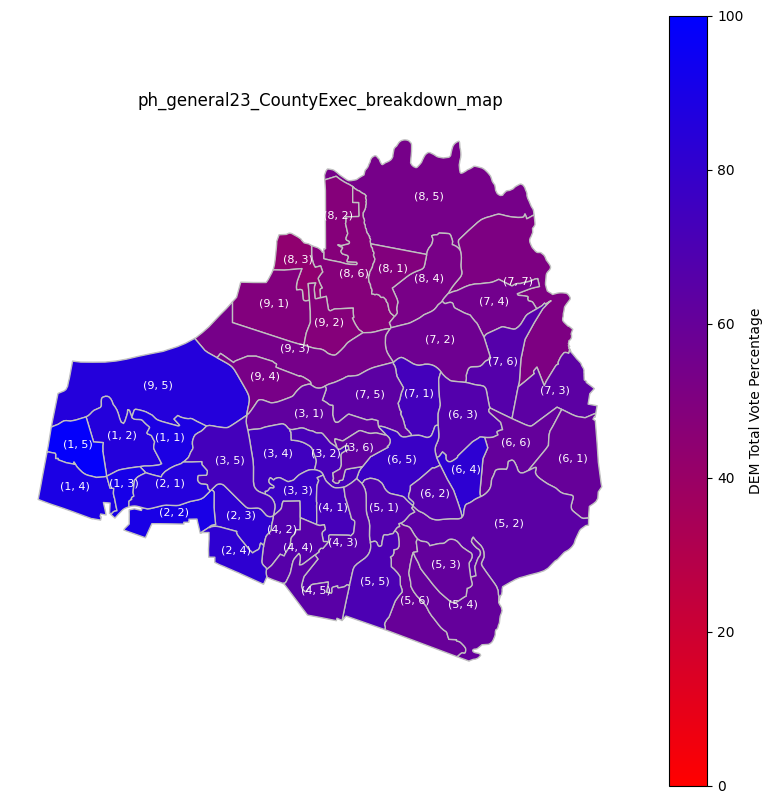

In [142]:
# Create a custom colormap from red to blue
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('red_to_blue', ['red', 'blue'])

# Modify the code to use the custom colormap
labeled_ph_general23_CountyExec_breakdown_map = ph_general23_CountyExec_breakdown_map.plot(column="DEM Total Vote Percentage", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "DEM Total Vote Percentage"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                       cmap=cmap, #Use the custom colormap
                       vmin=0,
                       vmax=100
                    )

# label each of the districts
for idx, row in ph_general23_CountyExec_breakdown_map.iterrows():
    ward = row['WARD_1']
    district = row['DISTRICT_1']
    label = f'({ward}, {district})'
    color = 'white'
    labeled_ph_general23_CountyExec_breakdown_map.annotate(label, xy=row.geometry.centroid.coords[0], ha='center', fontsize=8, color=color)

# hide the x and y axis on the plot & move the legend
labeled_ph_general23_CountyExec_breakdown_map.set_axis_off()
labeled_ph_general23_CountyExec_breakdown_map.set_title("ph_general23_CountyExec_breakdown_map")

plt.show()

#### District Attorney

In [124]:
allegheny_general23_DA_breakdown = allegheny_general23_breakdown_dict.get(list(allegheny_general23_breakdown_dict.keys())[6])

# format the column names
allegheny_general23_DA_breakdown_columns = ['County', 'Registered Voters', 'Election Day (GOP)', 'Absentee (GOP)', 'Provisional (GOP)', 'Total Votes (GOP)', 'Election Day (DEM)', 'Absentee (DEM)', 'Provisional (DEM)', 'Total Votes (DEM)', 'Election Day (Other)', 'Absentee (Other)', 'Provisional (Other)', 'Total Votes (Other)', 'Total']
allegheny_general23_DA_breakdown.columns = allegheny_general23_DA_breakdown_columns

# convert all but the first column from strings to integers
for col in allegheny_general23_DA_breakdown_columns:
    if (col != 'County'):
        allegheny_general23_DA_breakdown[col] = allegheny_general23_DA_breakdown[col].astype(int)

In [125]:
# calculate the percentage of turnout by party for each district, then add that to the df
allegheny_general23_DA_breakdown = allegheny_general23_DA_breakdown.assign(**{
    'DEM Total Vote Percentage': lambda x: (x['Total Votes (DEM)'] / x['Total'])*100,
    'GOP Total Vote Percentage': lambda x: (x['Total Votes (GOP)'] / x['Total'])*100,
    'Other Total Vote Percentage': lambda x: (x['Total Votes (Other)'] / x['Total'])*100
})

In [126]:
# Create the data splits for each municipality/borough in HD32
hd32_general23_DA_vote_breakdown = allegheny_general23_DA_breakdown[allegheny_general23_DA_breakdown['County'].isin(hd32_districts[0])]
hd32_general23_DA_vote_breakdown = hd32_general23_DA_vote_breakdown.reset_index(drop=True)

# get Penn Hills wards/precincts
ph_general23_DA_vote_breakdown = allegheny_general23_DA_breakdown[allegheny_general23_DA_breakdown['County'].str.contains("Penn Hills")]
ph_general23_DA_vote_breakdown = ph_general23_DA_vote_breakdown.reset_index(drop=True)
if not os.path.exists("ph_general23_DA_vote_breakdown.xlsx"):
    ph_general23_DA_vote_breakdown.to_excel("ph_general23_DA_vote_breakdown.xlsx", index=False)

# get the Verona wards/precincts
verona_general23_DA_vote_breakdown = allegheny_general23_DA_breakdown[allegheny_general23_DA_breakdown['County'].str.contains("Verona")]
verona_general23_DA_vote_breakdown = verona_general23_DA_vote_breakdown.reset_index(drop=True)

# get the Oakmont wards/precincts
oakmont_general23_DA_vote_breakdown = allegheny_general23_DA_breakdown[allegheny_general23_DA_breakdown['County'].str.contains("Oakmont")]
oakmont_general23_DA_vote_breakdown = oakmont_general23_DA_vote_breakdown.reset_index(drop=True)

# get the Plum wards/precincts
plum_general23_DA_vote_breakdown = allegheny_general23_DA_breakdown[allegheny_general23_DA_breakdown['County'].str.contains("Plum")]
plum_general23_DA_vote_breakdown = plum_general23_DA_vote_breakdown.reset_index(drop=True)

In [127]:
# link the election results to the map
#allegheny_general23_DA_breakdown_map = allegheny_district_map.merge(allegheny_general23_DA_breakdown, how='left', left_on='Muni_War_1', right_on='County')
hd32_general23_DA_breakdown_map = hd32_district_map.merge(hd32_general23_DA_vote_breakdown, how='left', left_on='Muni_War_1', right_on='County')
ph_general23_DA_breakdown_map = ph_district_map.merge(ph_general23_DA_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")
verona_general23_DA_breakdown_map = verona_district_map.merge(verona_general23_DA_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")
oakmont_general23_DA_breakdown_map = oakmont_district_map.merge(oakmont_general23_DA_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")
plum_general23_DA_breakdown_map = plum_district_map.merge(plum_general23_DA_vote_breakdown, how="left", left_on="Muni_War_1", right_on="County")

##### HD32

###### Vote Type (Democratic)

In [128]:
hd32_general23_DA_dem_mail_vote_ratio = (sum(hd32_general23_DA_vote_breakdown['Absentee (DEM)']) / sum(hd32_general23_DA_vote_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(hd32_general23_DA_dem_mail_vote_ratio))

hd32_general23_DA_dem_eday_vote_ratio = (sum(hd32_general23_DA_vote_breakdown['Election Day (DEM)']) / sum(hd32_general23_DA_vote_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(hd32_general23_DA_dem_eday_vote_ratio))

hd32_general23_DA_dem_provisional_vote_ratio = (sum(hd32_general23_DA_vote_breakdown['Provisional (DEM)']) / sum(hd32_general23_DA_vote_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(hd32_general23_DA_dem_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 41.94188963210702
Mail-in/Election Day Vote percentage: 57.221989966555185
Mail-in/Provisional Vote percentage: 0.8361204013377926


###### Vote Type (Republican)

In [129]:
hd32_general23_DA_gop_mail_vote_ratio = (sum(hd32_general23_DA_vote_breakdown['Absentee (GOP)']) / sum(hd32_general23_DA_vote_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(hd32_general23_DA_gop_mail_vote_ratio))

hd32_general23_DA_gop_eday_vote_ratio = (sum(hd32_general23_DA_vote_breakdown['Election Day (GOP)']) / sum(hd32_general23_DA_vote_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(hd32_general23_DA_gop_eday_vote_ratio))

hd32_general23_DA_gop_provisional_vote_ratio = (sum(hd32_general23_DA_vote_breakdown['Provisional (GOP)']) / sum(hd32_general23_DA_vote_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(hd32_general23_DA_gop_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 25.68922305764411
Mail-in/Election Day Vote percentage: 74.0373661426293
Mail-in/Provisional Vote percentage: 0.2734107997265892


###### Partisan Vote Split

In [130]:
hd32_general23_DA_dem_vote_ratio = (sum(hd32_general23_DA_vote_breakdown['Total Votes (DEM)']) / sum(hd32_general23_DA_vote_breakdown['Total'])) * 100
print("DEM Vote percentage: " + str(hd32_general23_DA_dem_vote_ratio))

hd32_general23_DA_gop_vote_ratio = (sum(hd32_general23_DA_vote_breakdown['Total Votes (GOP)']) / sum(hd32_general23_DA_vote_breakdown['Total'])) * 100
print("GOP Vote percentage: " + str(hd32_general23_DA_gop_vote_ratio))

hd32_general23_DA_other_vote_ratio = (sum(hd32_general23_DA_vote_breakdown['Total Votes (Other)']) / sum(hd32_general23_DA_vote_breakdown['Total'])) * 100
print("Other Vote percentage: " + str(hd32_general23_DA_other_vote_ratio))

DEM Vote percentage: 52.104775908076014
GOP Vote percentage: 47.80264662636824
Other Vote percentage: 0.09257746555573708


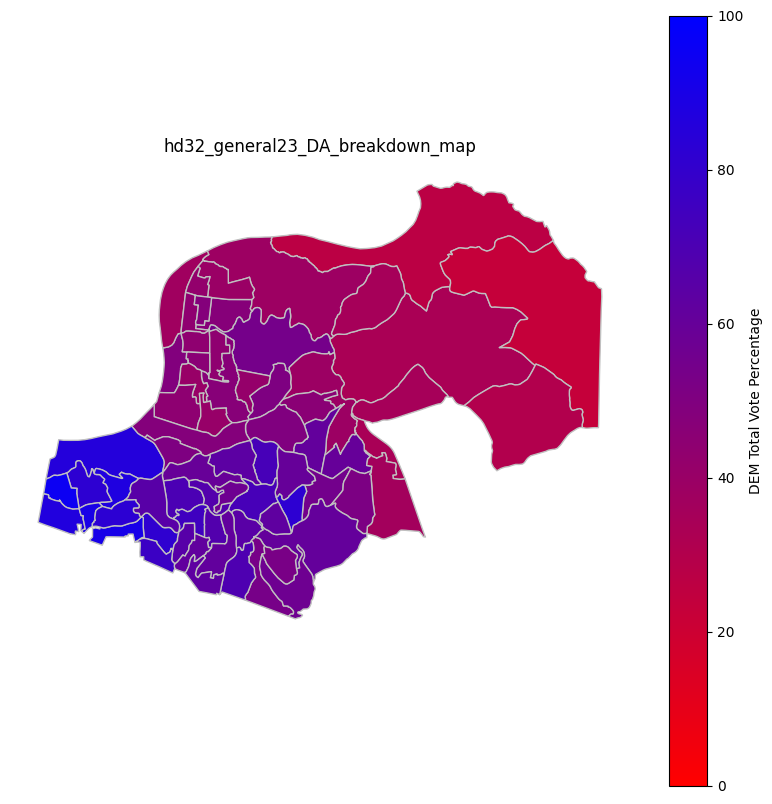

In [144]:
# Create a custom colormap from red to blue
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('red_to_blue', ['red', 'blue'])

# Modify the code to use the custom colormap
labeled_hd32_general23_DA_breakdown_map = hd32_general23_DA_breakdown_map.plot(column="DEM Total Vote Percentage", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "DEM Total Vote Percentage"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                       cmap=cmap, #Use the custom colormap
                       vmin=0,
                       vmax=100
                    )

# hide the x and y axis on the plot & move the legend
labeled_hd32_general23_DA_breakdown_map.set_axis_off()
labeled_hd32_general23_DA_breakdown_map.set_title("hd32_general23_DA_breakdown_map")

plt.show()

##### Penn Hills

###### Vote Type (Democratic)

In [132]:
ph_general23_DA_dem_mail_vote_ratio = (sum(ph_general23_DA_vote_breakdown['Absentee (DEM)']) / sum(ph_general23_DA_vote_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(ph_general23_DA_dem_mail_vote_ratio))

ph_general23_DA_dem_eday_vote_ratio = (sum(ph_general23_DA_vote_breakdown['Election Day (DEM)']) / sum(ph_general23_DA_vote_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(ph_general23_DA_dem_eday_vote_ratio))

ph_general23_DA_dem_provisional_vote_ratio = (sum(ph_general23_DA_vote_breakdown['Provisional (DEM)']) / sum(ph_general23_DA_vote_breakdown['Total Votes (DEM)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(ph_general23_DA_dem_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 42.452550415183865
Mail-in/Election Day Vote percentage: 56.68742586002372
Mail-in/Provisional Vote percentage: 0.8600237247924081


###### Vote Type (Republican)

In [133]:
ph_general23_DA_gop_mail_vote_ratio = (sum(ph_general23_DA_vote_breakdown['Absentee (GOP)']) / sum(ph_general23_DA_vote_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Absentee Vote percentage: " + str(ph_general23_DA_gop_mail_vote_ratio))

ph_general23_DA_gop_eday_vote_ratio = (sum(ph_general23_DA_vote_breakdown['Election Day (GOP)']) / sum(ph_general23_DA_vote_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Election Day Vote percentage: " + str(ph_general23_DA_gop_eday_vote_ratio))

ph_general23_DA_gop_provisional_vote_ratio = (sum(ph_general23_DA_vote_breakdown['Provisional (GOP)']) / sum(ph_general23_CountyExec_vote_breakdown['Total Votes (GOP)'])) * 100
print("Mail-in/Provisional Vote percentage: " + str(ph_general23_DA_gop_provisional_vote_ratio))

Mail-in/Absentee Vote percentage: 29.626972740315637
Mail-in/Election Day Vote percentage: 70.0860832137733
Mail-in/Provisional Vote percentage: 0.321285140562249


###### Partisan Vote Split

In [134]:
ph_general23_DA_dem_vote_ratio = (sum(ph_general23_DA_vote_breakdown['Total Votes (DEM)']) / sum(ph_general23_DA_vote_breakdown['Total'])) * 100
print("DEM Vote percentage: " + str(ph_general23_DA_dem_vote_ratio))

ph_general23_DA_gop_vote_ratio = (sum(ph_general23_DA_vote_breakdown['Total Votes (GOP)']) / sum(ph_general23_DA_vote_breakdown['Total'])) * 100
print("GOP Vote percentage: " + str(ph_general23_DA_gop_vote_ratio))

ph_general23_DA_other_vote_ratio = (sum(ph_general23_DA_vote_breakdown['Total Votes (Other)']) / sum(ph_general23_DA_vote_breakdown['Total'])) * 100
print("Other Vote percentage: " + str(ph_general23_DA_other_vote_ratio))

DEM Vote percentage: 61.65660998354361
GOP Vote percentage: 38.23368074602304
Other Vote percentage: 0.10970927043335163


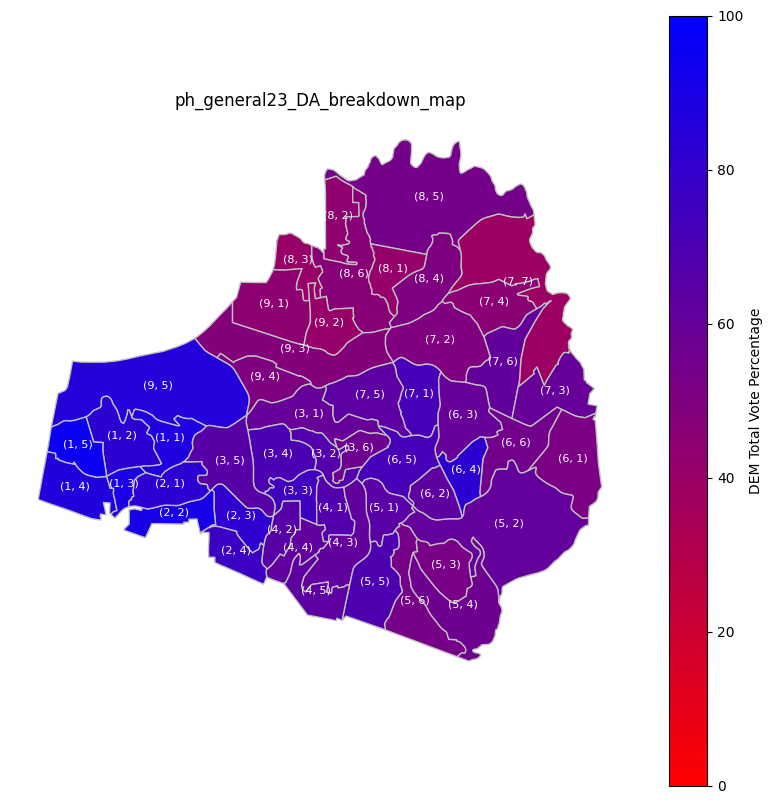

In [141]:
# Create a custom colormap from red to blue
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('red_to_blue', ['red', 'blue'])

# Modify the code to use the custom colormap
labeled_ph_general23_DA_breakdown_map = ph_general23_DA_breakdown_map.plot(column="DEM Total Vote Percentage", #Set the data to be used for coloring
                       edgecolor="#C0C0C0", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "DEM Total Vote Percentage"}, #Label the legend
                       figsize=(10,10), #Set the size of the graph
                       cmap=cmap, #Use the custom colormap
                       vmin=0,
                       vmax=100
                    )

# label each of the districts
for idx, row in ph_general23_DA_breakdown_map.iterrows():
    ward = row['WARD_1']
    district = row['DISTRICT_1']
    label = f'({ward}, {district})'
    color = 'white'
    labeled_ph_general23_DA_breakdown_map.annotate(label, xy=row.geometry.centroid.coords[0], ha='center', fontsize=8, color=color)

# hide the x and y axis on the plot & move the legend
labeled_ph_general23_DA_breakdown_map.set_axis_off()
labeled_ph_general23_DA_breakdown_map.set_title("ph_general23_DA_breakdown_map")

plt.show()